# Distributed Information Systems
### Prof. Karl Aberer <br> Final Exam, Spring Semester 2018

The following materials are allowed: exercise sheets
and solutions, past exams with your own solution, personally written notes and personally collected documentation.
  
The exam will be held on your computer, but digital communication by any means is strictly prohibited. You are not allowed to use any form of Web browsing, except to connect to Moodle and to download and upload the exam. By participating to this exam you agree to these conditions.

These are the instructions for the exam:
1. You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
* We will publish 15 minutes before the end of the exam a password for uploading your solutions on Moodle.
* It is not recommended to leave the exam before the password is published. If you need to leave earlier contact us.

# Question 1: Multiple Choice Questions

Answer the [multiple choice questions in Moodle](https://moodle.epfl.ch/mod/quiz/view.php?id=988129) as in the quizzes.

The password for answering the quiz is: **wBHNcJZd**.

# Question 2: User Classification in Social Networks

Assume we would like to identify Twitter user accounts $T$ that have interest in Swiss universities.

Given that we have no training data, we analyse the social relationships of those users.

More specifically, we consider that users that follow an Twitter account $S$ related to a Swiss University (e.g. @EPFL, @EPFL\_en, @ETHZ etc.) show interest for Swiss universities. We assume that $S$ and $T$ are disjoint. We capture the follower relationship in a matrix $F$, where an entry $f_{ij} = 1$ indicates a follower link from user account $i\in T$ to university account $j\in S$. Otherwise the entry is zero.

We would like to assess the level of interest of users into Swiss universities by using two methods:
1. The HITS algorithm, where we consider the Swiss university accounts as authorities and the users we intend to classify as hubs. A high hub value $t_i$ for user $i\in T$ should indicate a high level of interest in Swiss universities, a high authority value $s_j$ indicates that university account $j\in S$ is a good indicator for interest in Swiss universities.
2. The EM algorithm, where we consider the existence of a follower link from a user to a Swiss university account as a positive feedback given that university account on the interest of the user , and the absence of such a link as negative feedback (i.e. we consider the university accounts like experts and the users like the item to be evaluated). A high level of positive feedback $t_i$ for user $i\in T$ indicates interest in Swiss universities, and a high expertise value $s_j$ indicates that university account $j\in S$ is a good indicator for interest in Swiss universities.

### Questions

1) Formulate the two algorithms (HITS and EM) using the following patterns for a recursive computation of $t$ and $s$

HITS:  $\vec{t}_{k+1} = r_1  M_1. \vec{v_1},\ \vec{s}_{k+1} = r_2  M_2 . \vec{v_2}$

EM:    $\vec{t}_{k+1} = r_3  M_3 . \vec{v_3},\ \vec{s}_{k+1} = r_4 (M_4.\vec{v_4} + M_5.\vec{v_5})$

$\vec{t}=(t_1,\ldots,t_n)$ and $\vec{s}=(s_1,\ldots,s_m)$ are the vectors ranking interest and expertise of users and universities. Your task is to express $r_p$, $\vec{v_p}$ and $M_p$, $p=1,\ldots,5$ in terms of $\vec{t}_{k}$, $\vec{s}_{k}$ and $F$, where $r_p$ are scalars, $\vec{v_p}$ are vectors and $M_p$ are matrices.

You can use also the following functions:

$|\vec{v}|_2$ for the 2-norm

$|\vec{v}|_1$ for the 1-norm

$M^t$ for the matrix transpose

$round(\vec{v})$ for rounding the values of a vector in $[0,1]$ to $0$ and $1$
 
2) For HITS: in which sense is the input to the algorithm a special case of the most general possible inputs? Which additional constraints does the formulation of the problem satisfy?

3) Assume after applying HITS or EM you perform a binary classification of the accounts by setting a threshold on the values in $\vec{t}$, i.e., all accounts with a authority/interest value above the threshold are considered as accounts interested in Swiss universities. Identify and shortly describe a simple, standard classification algorithm that uses the accounts with binary labels as training data to classify new accounts and that does not require training (and does not rely on recomputing HITS or EM).
  
Please provide your answers in the cell below:

# Question 3:  Betweenness Centrality in Social Networks
  
  
"Les misérables" is a novel written by Victor Hugo and is considered as one of the greatest novels of the 19th century. In this question, you will analyze the social network composed by the protagonists of the novel. The character network represents the interactions among character and has been created, by hand, by Donald E. Knuth.

In [ ]:
import json
import pandas as pd
import operator
import networkx as nx
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from dis_helpers import *

In [ ]:
G = ex1_load_graph()

In [ ]:
ex1_draw(G, nx.betweenness_centrality(G))
centr = nx.betweenness_centrality(G,normalized=False)

ex1_print_topn(centr,10)

### Definition

In this problem, you will have to implement node betweeness centrality, a measure that provide a score for every node $n$ of a graph $G$.  
  
Betweenness centrality $c_B(n)$ of a node $n$ is the sum of the fraction of all-pairs shortest paths that pass through $n$:  
  
$\Large c_B(n) =\sum_{s,t \in N} \frac{\sigma(s, t|n)}{\sigma(s, t)}$
  
where $N$ is the set of nodes, $\sigma(s, t)$ is the number of shortest paths connecting $s$ and $t$, and $\sigma(s, t|n)$ is the number of paths passing through node $n$, provided $n$ is different from $s$ and $t$. For the other cases $\sigma(s, t|n)$ is defined as follows: 
* If $s = t$: $\sigma(s, t) = 1$
* If $n \in \{s, t\}$: $\sigma(s, t|n) = 0$

Note that this definition of node betweenness employs no normalization.
  
### Code Cheat Sheet

Here we provide a few explainations about some of the functions you might need.

The function ``enumerate(['a','b','c'])`` provides a convenient way to create an index while iterating over a list. For example:

In [ ]:
for i,n in enumerate(['Napoleon','Myriel','Mlle.Baptistine','Mme.Magloire']):
    print(i,n)

The function ``nx.all_shortest_paths(G,s,t)`` returns a list of all the shortest paths between nodes $s$ and $t$, given the graph $G$. Note that you can directly use node labels to specify the nodes, such as in the example below:

In [ ]:
for i in nx.all_shortest_paths(G,'Tholomyes','Mme.Magloire'):
    print(i)

### Questions
1) Fill the code skeleton below to compute the betweenness centrality for every node of the graph.   

2) The proposed code skeleton has an unnecessary high time complexity. Can you propose a solution to decrease it? Please answer in the cell below. 

3) Does the PageRank algorithm always produce the same values as node betweenness, after normalizing the node betweenness values to the interval [0,1]? For PageRank, consider that every edge of the undirected graph is replaced by two directed edges going in both directions. Provide an answer and an argument to support your answer in the cell below. 

In [ ]:
characters = list(G.nodes())
result   = {}

# compute a score fo every character
for n in characters:

    # accumulator for the score of the current character
    accum = 0

    # shortest path FROM every character...
    for i,s in enumerate(characters):
        # ..TO every character
        for j,t in enumerate(characters):
            # we do not consider the same path twice
            if j > i:
                continue
            
            try:  
                all_short = nx.all_shortest_paths(G,s,t)
                
                ### SOLUTION ####################################
                num   = 0
                denum = 0
                for p in all_short:

                    px = set(p)
                    px = px - set([s])
                    px = px - set([t])
                    if n in px:
                        num += 1
                    denum += 1
                    
                if s==t:
                    denum = 1

                if n==s or n==t:
                    num = 0
                
                accum += float(num)/float(denum)
                ### END SOLUTION ################################
                
            except nx.NetworkXNoPath:
                continue
                
    result[n] = accum
    
ex1_print_topn(result,10)

# Question 4: Sentiment Classification of Movie Reviews
The goal of this problem is to build an end-to-end _Sentiment Classification_ pipeline. In order to achieve this, you will have to go through the subtasks that are indicated below and fill in the code in the respective placeholders. Notice that you are not allowed to use external libraries other than the ones that are already imported in the project.


In [ ]:
#Required libraries.
import os
import string
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
def read_corpus():
    '''Reads corpus from files.'''
    
    neg_reviews = []
    pos_reviews = []
    DIR = 'movie_reviews/'

    for l, sent in [(neg_reviews, 'neg'), (pos_reviews, 'pos')]:
        for file in os.listdir(DIR+sent):
            with open(os.path.join(DIR+sent, file)) as f:
                text = f.read()
            # split into words
            tokens = word_tokenize(text)
            # convert to lower case
            tokens = [w.lower() for w in tokens]
            # remove punctuation from each word
            table = str.maketrans('', '', string.punctuation)
            stripped = [w.translate(table) for w in tokens]
            # remove remaining tokens that are not alphabetic
            words = [word for word in stripped if word.isalpha()]
            # filter out stop words
            words = [w for w in words if not w in stop_words]

            l.append(' '.join(words))
    return neg_reviews, pos_reviews

### Task 1
Split your corpus into a training and a test set with ratio 9:1. 
* _Hint: Make sure that both sets are equally populated w.r.t. the two sentiments._

In [ ]:
neg_reviews, pos_reviews = read_corpus()

In [ ]:
############### ADD YOUR CODE HERE ###############
neg_reviews_train = []
pos_reviews_train = []

neg_reviews_test = []
pos_reviews_test = []

reviews_train = []
reviews_test = []
############### ADD YOUR CODE HERE ###############

# ############### SOLUTION ###############
# neg_reviews_train = neg_reviews[:int(len(neg_reviews)*0.9)]
# pos_reviews_train = pos_reviews[:int(len(pos_reviews)*0.9)]

# neg_reviews_test = neg_reviews[int(len(neg_reviews)*0.9):]
# pos_reviews_test = pos_reviews[int(len(pos_reviews)*0.9):]

# reviews_train = neg_reviews_train + pos_reviews_train
# reviews_test = neg_reviews_test + pos_reviews_test
# ############### SOLUTION ###############

### Task 2
Transform the reviews of the training set into vectors using the Bag-Of-Words model. Each dimension of a vector must count the number of occurences of a word in the review.
* _Hint 1: Make sure that all the vectors belong to the same space._
* _Hint 2: For this task you can reuse code from the first exercise of DIS2018 (Vector Space Retrieval)._

In [ ]:
def create_vocabulary(corpus, min_tf):
    '''Creates the vocabulary (set of distinct words) that appear more than $min_tf$ times in the corpus.'''
    
    count = {}
    for document in corpus:
        for word in document.split():
            if word in count:
                count[word] += 1
            else:
                count[word] = 0
    
    vocabulary = []
    for w, c in count.items():
        if c > min_tf:
            vocabulary.append(w)
    
    return vocabulary
    
vocabulary = create_vocabulary(reviews_train, len(reviews_train)*0.005)

In [ ]:
def transform_to_vector(reviews):
    '''Transforms a list of reviews to a list of vectors.'''
    
    reviews_vec = []

    for review in reviews:
        
        
        ############### ADD YOUR CODE HERE ###############
        vector = []
        ############### ADD YOUR CODE HERE ###############
        
#         ############### SOLUTION ###############
#         count = {}
#         for word in review.split():
#             if word in count:
#                 count[word] += 1
#             else:
#                 count[word] = 0

#         #move to vocabulary space
#         vector = [0]*len(vocabulary)
#         for i,term in enumerate(vocabulary):
#             if term in count:
#                 vector[i] = count[term]
        
#         ############### SOLUTION ###############

        reviews_vec.append(vector)

    return reviews_vec

neg_reviews_train_vec = transform_to_vector(neg_reviews_train)
pos_reviews_train_vec = transform_to_vector(pos_reviews_train)

### Task 3 
Aggregate the vectors of the positive and negative reviews of the training set into a single vector. This vector will be the representative vector of each of the two sentiments. Which aggregation function did you choose and why?

In [ ]:
def aggregate_vector_list(vlist, aggfunc):
    if aggfunc == 'max':
        return np.array(neg_reviews_train_vec).max(axis=0)
    elif aggfunc == 'min':
        return np.array(neg_reviews_train_vec).min(axis=0)
    elif aggfunc == 'mean':
        return np.array(neg_reviews_train_vec).mean(axis=0)
    else:
        return np.zeros(np.array(neg_reviews_train_vec).shape[1])

############### ADD YOUR CODE HERE ###############
neg_reviews_repr = []
pos_reviews_repr = []
############### ADD YOUR CODE HERE ###############

# ############### SOLUTION ###############
# neg_reviews_repr = aggregate_vector_list(neg_reviews_train_vec, 'mean')
# pos_reviews_repr = aggregate_vector_list(pos_reviews_train_vec, 'mean')
# ############### SOLUTION ###############

Answer:

### Task 4
Transform the reviews of the movies in the test set into vectors. 
* _Hint: Make sure that all the vectors belong to the same space as the ones from the training set._


In [ ]:
############### ADD YOUR CODE HERE ###############
neg_reviews_test_vec = []
pos_reviews_test_vec = []
############### ADD YOUR CODE HERE ###############

# ############### SOLUTION ###############
# neg_reviews_test_vec = transform_to_vector(neg_reviews_test)
# pos_reviews_test_vec = transform_to_vector(pos_reviews_test)
# ############### SOLUTION ###############

### Task 5
Consider the following Naive Bayes sentiment classifier:

\begin{equation*}
P(sentiment | review)   = \frac{P(review | sentiment) * P(sentiment)}{P(review)}
\end{equation*}

Assume that you can estimate the likelihood probability as follows:

\begin{equation*}
P(review | sentiment) = cosine\_similarity(review\_vec, sentiment\_representative\_vec)
\end{equation*}

1) How do you take into account the probabilities: $P(sentiment)$ and $P(review)$?

Answer:

2) Implement the classifier and compute its performance in terms of false negatives, true negatives, falsepositives and true positives.

In [ ]:
fn = 0
tn = 0
fp = 0
tp = 0

def cosine_similarity(a,b):
    '''Computes the cosine similarity of $a$ and $b$.'''
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)
    
############### ADD YOUR CODE HERE ###############

############### ADD YOUR CODE HERE ###############

# ############### SOLUTION ###############
# def naive_bayes(review_vec):
#     if  cosine_similarity(np.array(review_vec), neg_reviews_repr) > cosine_similarity(np.array(review_vec), pos_reviews_repr):
#         return 'neg'
#     else:
#         return 'pos'

# for review_vec in neg_reviews_test_vec:
#     if naive_bayes(review_vec) == 'neg':
#         tn +=1
#     else:
#         fp +=1

# for review_vec in pos_reviews_test_vec:
#     if naive_bayes(review_vec) == 'neg':
#         fn +=1
#     else:
#         tp +=1
# ############### SOLUTION ###############

### Task 6
Compute the _F-measure_ to evaluate your classifier.

In [ ]:
############### ADD YOUR CODE HERE ###############
precision = 0
recall = 0
f_measure = 0
print('F-measure: ', f_measure)
############### ADD YOUR CODE HERE ###############

# ############### SOLUTION ###############
# precision = tp/(tp+fp)
# recall = tp/(tp+fn)
# f_measure = 2*precision*recall/(precision+recall)
# print('F-measure: ', f_measure)
# ############### SOLUTION ###############

# Distributed Information Systems

***Final Exam, Spring Semester, 2019***

The exam will be held on your computer, but digital communication by any means is **strictly prohibited**. You are allowed, though, to use *StackOverflow* or similar websites to resolve syntax-related Python errors. 
The following materials are also allowed: exercise sheets and solutions, past exams with your own solution, personally written notes and personally collected documentation.
By participating in this exam you **agree to these conditions**.

These are the instructions for the exam:

- You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
- The quiz will remain open **only for the first 2 hours** of the exam to avoid network congestion.
- **30 minutes** before the end of the exam we will announce a password to upload your jupyter notebook on Moodle.
- It is not recommended to leave the exam before the password is published. If you need to leave earlier, contact us.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0-Rename-your-notebook" data-toc-modified-id="0-Rename-your-notebook-0">0 Rename your notebook</a></span></li><li><span><a href="#1-Multiple-Choice-Questions" data-toc-modified-id="1-Multiple-Choice-Questions-1">1 <a href="https://moodle.epfl.ch/mod/quiz/view.php?id=1026316" target="_blank">Multiple Choice Questions</a></a></span></li><li><span><a href="#2-Implementing-a-Rule-Based-Approach-for-Entity-Disambiguation" data-toc-modified-id="2-Implementing-a-Rule-Based-Approach-for-Entity-Disambiguation-2">2 Implementing a Rule-Based Approach for Entity Disambiguation</a></span><ul class="toc-item"><li><span><a href="#2.1-Learning-rules" data-toc-modified-id="2.1-Learning-rules-2.1">2.1 Learning rules</a></span></li><li><span><a href="#2.2-Finding-new-rules-using-bootstrapping" data-toc-modified-id="2.2-Finding-new-rules-using-bootstrapping-2.2">2.2 Finding new rules using bootstrapping</a></span></li></ul></li><li><span><a href="#3-Academic-Communities" data-toc-modified-id="3-Academic-Communities-3">3 Academic Communities</a></span><ul class="toc-item"><li><span><a href="#3.1-Modularity" data-toc-modified-id="3.1-Modularity-3.1">3.1 Modularity</a></span></li><li><span><a href="#3.2-Community-Detection" data-toc-modified-id="3.2-Community-Detection-3.2">3.2 Community Detection</a></span></li><li><span><a href="#3.3-Community-Influencers" data-toc-modified-id="3.3-Community-Influencers-3.3">3.3 Community Influencers</a></span></li><li><span><a href="#3.4-Connectivity-Based-Community-Ranking" data-toc-modified-id="3.4-Connectivity-Based-Community-Ranking-3.4">3.4 Connectivity-Based Community Ranking</a></span></li><li><span><a href="#3.5-Personalized-Community-Ranking" data-toc-modified-id="3.5-Personalized-Community-Ranking-3.5">3.5 Personalized Community Ranking</a></span></li><li><span><a href="#3.6-TF-IDF-Community-Ranking" data-toc-modified-id="3.6-TF-IDF-Community-Ranking-3.6">3.6 TF-IDF Community Ranking</a></span></li><li><span><a href="#3.7-Rankings-Correlation" data-toc-modified-id="3.7-Rankings-Correlation-3.7">3.7 Rankings Correlation</a></span></li></ul></li><li><span><a href="#Removed" data-toc-modified-id="Removed-4">Removed</a></span><ul class="toc-item"><li><span><a href="#What-is-a-profile-based-recommendation-ranking-for-a-user?" data-toc-modified-id="What-is-a-profile-based-recommendation-ranking-for-a-user?-4.1">What is a profile-based recommendation ranking for a user?</a></span></li><li><span><a href="#What-is-the-ranking-of-the-communities-based-on-the-importance-of-their-nodes?" data-toc-modified-id="What-is-the-ranking-of-the-communities-based-on-the-importance-of-their-nodes?-4.2">What is the ranking of the communities based on the importance of their nodes?</a></span></li><li><span><a href="#What-is-the-ranking-of-the-communities-based-on-their-intra-connectivity?" data-toc-modified-id="What-is-the-ranking-of-the-communities-based-on-their-intra-connectivity?-4.3">What is the ranking of the communities based on their intra-connectivity?</a></span></li></ul></li></ul></div>

## 0 Rename your notebook
Replace SciperNo with your **personal SCIPER Number**.

## 1 [Multiple Choice Questions](https://moodle.epfl.ch/mod/quiz/view.php?id=1026316)


## 2 Implementing a Rule-Based Approach for Entity Disambiguation

### 2.1 Learning rules

We would like to develop a rule-based approach to disambiguate the meaning of the term "Apple" in sentences into the two possible meanings **Tech** and **Fruit**. The rules use keyphrases i.e., n-grams of words, as features in their conditions. In the approach **only the top-k keyphrases** are considered. Before forming keyphrases, the words are stemmed, stopwords are not considered and uppercase words are converted to lowercase.

An example of a possible rule would be:

	if "fruit" and "facebook" then "Tech"

meaning that if a sentence that contains the term "Apple" also contains the unigrams "fruit" and "facebook" then the meaning of "Apple" should be the Apple technology company (**Tech**).

More generally we write such rules as:

	{k1,...,kn} -> Tech or {k1,...,kn} -> Fruit
    
where k1,..,kn are arbitrary word n-grams and a set {k1,...,kn} is considered as an item set.

As **training data** we obtain 10 sentences containing "Apple" that have been labelled by their meaning as T(ech) or F(ruit).

    An apple is a fruit and good for health. (F)
    Apple is a tech company. (T)
    Tech companies like Apple and Facebook have big data centers (T)
    For maintaining health eat one apple a day. (F)
    A new Apple data center has been opened next to the one of Facebook. (T)
    Apple has sold 1 million units in one day. (T)
    Fruits, like apples and pears, are contaminated with pesticides.  (F)
    A fruit salad contains apples, bananas and pears.  (F)
    I saw a new apple recipe on Facebook.  (F)
    Apple is increasingly processing health data. (T)

**Stopwords** are: an, is, a, and, for, like, and, have, has, been, in, are, with, on, by, as, may, one, to, the, of.

We define the **confidence** of a rule {k1,...,kn} -> T as the fraction between the number of sentences that contain all keyphrases k1,...,kn with label T over the number of sentences with all keyphrases k1,...,kn. Similar definition for {k1,...,kn} -> F.

We define the **support** of an itemset as the number of sentences that contain all the n-grams in the itemset.

**Questions:** 
1. Without considering the word "apple", determine the keyphrases with minimum document frequency of 2.
2. Determine all itemsets of keyphrases with a minimum support of 2.
3. Determine all rules that have a minimum support of 2 and a minimum confidence of 70%. Provide for each rule its support and confidence values. 
4. Explain how the apriori property could be exploited in optimizing the computation of those itemsets for composite keyphrases.

Hint: the following are the top-10 document frequencies of terms.

| Term        | Frequency           | 
| ------------- |:-------------:| 
|fruit | 3|
|health | 3|
|data | 3|
|facebook | 3|
|tech | 2|
|compani | 2|
|center | 2|
|day | 2|
|new | 2|
|pear |2|

***ANSWER:***



### 2.2 Finding new rules using bootstrapping

We are using the rules we have learnt now to find new sentences on Apple (e.g. using Google search) to increase our training data and thus learning new rules.

Performing this approach we found 10 more sentences:

    Apple and Facebook data center filed plans to expand data center operations in Prineville (T) 
    Apple, Facebook, Google Asked to Pay for Wind Parks in Denmark (T) 
    Google, Facebook and Apple lead on green data centers (T)
    Apple to contest patent filed by Google. (T) 
    Green data centers are the new priority for Apple and Google. (T)
    Green apples are an ideal ingredient for fruit salad. (F)
    Apple Pears have been described as the hottest new item since the Kiwi (F)
    Join Facebook to connect with Apples Pear and others you may know (F)
    An apple is a sweet, edible fruit produced by an apple tree (F)
    An apple a day keeps the doctor away (F)

**Questions:** 

1. Given that the size of the training set has increased, should confidence and/or support threshold be adapted and how?
2. Identify all new rules with adapted confidence and support threshold that can be derived from the training set that has been enlarged by the examples that have been retrieved using a bootstrapping approach.
3. Once you found a new rule, explain how you would proceed to verify that the new rule does not introduce semantic shift.

***ANSWER:***



## 3 Academic Communities
The dataset you are about to explore is a snapshot of the **retweet network** among official accounts of universities and academic institutes. The **nodes** of the network are twitter handles (usernames), while the **edges** are attributed with a **label**, which was extracted from the topic of the tweet, and a **weight**, which depicts the popularity of the original tweet.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms import community
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
G = nx.from_pandas_edgelist(pd.read_csv('uni_network.csv'), 'Source', 'Target', edge_attr=['Label', 'Weight'])

### 3.1 Modularity
- Implement the modularity metric for communities.
- Use the toy example and the assertion below to validate your results.
- Hint: You can reuse code from the exercise sessions.

In [3]:
def communities_modularity(G, nodes_community):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
       output: Q (modularity metric)
    '''
    Q = 0
    
    # Add your code here
    m = len(G.edges)
    for node_i in G.nodes:
        for node_j in G.nodes:
            if nodes_community[node_i] == nodes_community[node_j]:
                Q += G.number_of_edges(node_i, node_j) - G.degree[node_i]*G.degree[node_j]/(2*m)
    Q = Q/(2*m)
    # Add your code here

    return Q 

Q = communities_modularity(nx.Graph([(1, 2), (2, 3), (3, 1)]), {1:'a', 2:'a', 3:'a'})
assert (round(Q, 4) == 0.0)

### 3.2 Community Detection

- In the following cells you are given two snippets of code for community detection:
    - The first approach (`network_structure_communities`) computes communities based on the **network structure**. The algorithm that is used is the *Clauset-Newman-Moore greedy modularity maximization* and is similar to the *Louvain modularity maximization*.
    - The second approach (`nodes_label_communities`) computes communities based on the **labels of the graph nodes**. The label of a node is determined by the dominant label of its edges. All nodes with the same label belong to the same community.

- Based on the statistics that we present below, discuss what are the **pros and cons** of each approach.
- Note: You don't have to code for this task.

In [4]:
def network_structure_communities(G):
    nodes_community = community.greedy_modularity_communities(G, weight='Weight')
    nodes_community = {i:indx for indx, c in enumerate(nodes_community) for i in c}
    nodes_community = {n:nodes_community[n] for n in G.nodes}
    return nodes_community

In [5]:
def nodes_label_communities(G):
    nodes_community = {}
    for n in G.nodes():
        labels = [[e[2]['Label']]*e[2]['Weight'] for e in G.edges(n, data=True)]
        labels = [item for l in labels for item in l]
        nodes_community[n] = max(set(labels), key = labels.count)
    return nodes_community

In [6]:
def compare_approaches(G):
    nodes_community_1 = network_structure_communities(G)
    nodes_community_2 = nodes_label_communities(G)
    communities_count_1 = len(set(nodes_community_1.values()))
    communities_count_2 = len(set(nodes_community_2.values()))

    return pd.DataFrame.from_dict([{'':'1st approach', 'Communities Count':communities_count_1, 'Average Community Size':len(G.nodes())/communities_count_1, 'Modularity':communities_modularity(G, nodes_community_1)},\
                                   {'':'2nd approach', 'Communities Count':communities_count_2, 'Average Community Size':len(G.nodes())/communities_count_2, 'Modularity':communities_modularity(G, nodes_community_2)}]).set_index('')

compare_approaches(G)

,Average Community Size,Communities Count,Modularity
,,,
1st approach,3.192053,453,0.919974
2nd approach,48.200000,30,0.688264


***ANSWER:***

In the following tasks we will use the communities that are detected by the **second approach**.

In [7]:
nodes_community = nodes_label_communities(G)
communities = list(set(nodes_community.values()))
communities_count = len(communities)
default_ranking = {c:0.0 for c in communities}

### 3.3 Community Influencers
- Isolate each community from the graph. 
- Select the node with the **maximum pagerank** within each community as the **influencer** of that community.
- Break ties arbitrarily.
- Hint: Useful functions: `nx.pagerank()`, `G.subgraph()`.

In [8]:
def community_influencers(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: influencers:{community_id:node_id}
    '''
    influencers = {}
    
    # Add your code here
    
    for c in communities:
        nodes = [n for n in G.nodes if nodes_community[n]==c]
        pr = nx.pagerank(G.subgraph(nodes))
        influencers[c] = max(pr, key=pr.get)

    # Add your code here
    
    return influencers

influencers = community_influencers(G, nodes_community, communities, communities_count)
sorted(influencers.items(), key=lambda x: x[0]) if influencers != {} else None # prints sorted results

[('architecture', 'UniofGreenwich'),
 ('artificial intelligence', 'HECParis'),
 ('astronomy', 'HistAstro'),
 ('biological', 'thatsfarming'),
 ('cancer', 'IrishCancerSoc'),
 ('cell', 'GilesYeo'),
 ('chemistry', 'UniofNottingham'),
 ('climate change', 'meganrowling'),
 ('computer science', 'UniofHerts'),
 ('criminology', 'ARUEngagement'),
 ('cyber security', 'eevriviades'),
 ('diabetes', 'UoMNews'),
 ('drones', 'HarperAdamsUni'),
 ('economics', 'EmPoints'),
 ('entrepreneurship', 'RoyalAgUni'),
 ('geography', 'drheatherprice'),
 ('healthcare', 'VoiceofNursing_'),
 ('infection', 'UofGMVLS'),
 ('innovation', 'tcddublin'),
 ('medicine', 'learnhospice'),
 ('neuroscience', 'ArtScienceDoc'),
 ('pathways', 'RyanAcademy'),
 ('patients', 'WPXI'),
 ('physicist', 'royalsociety'),
 ('physics', 'SymeonDagkas'),
 ('psychology', 'BPSOfficial'),
 ('robotics', 'Phil_Baty'),
 ('social media', 'NYDailyNews'),
 ('sustainability', 'UniversityLeeds'),
 ('therapy', 'UBICBrighton')]

### 3.4 Connectivity-Based Community Ranking
- Compute a meta graph where nodes are communities and edges denote inter-connections across communities. 
- Add the weights of the inter-connections as weights to the edges.
- Compute `pagerank` on the meta graph.
- Hint: `w_matrix` is the confusion matrix of the weights among the communities. `w_matrix` is not symmetric.

In [9]:
def connectivity_ranking(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: communities_ranking:{community_id:ranking}

    '''
    communities_ranking = default_ranking.copy()
    
    meta_G = nx.Graph()
    w_matrix = {c2:{c1:0 for c1 in communities} for c2 in communities}
    for (n1, n2, weight) in G.edges(data='Weight'):
        w_matrix[nodes_community[n1]][nodes_community[n2]] += weight

    # Add your code here
    
    for c1 in communities:
        for c2 in communities:
            if (c1 < c2):
                weight = w_matrix[c1][c2] + w_matrix[c2][c1]
                meta_G.add_edge(c1, c2, weight=weight)

    communities_ranking = nx.pagerank(meta_G)
    
    # Add your code here
    
    return communities_ranking

connectivity_ranking = connectivity_ranking(G, nodes_community, communities, communities_count)
sorted(connectivity_ranking.items(), key=lambda x: x[1], reverse=True) if connectivity_ranking != default_ranking else None # prints sorted results

[('innovation', 0.1175316220359166),
 ('artificial intelligence', 0.1157057509495049),
 ('psychology', 0.07266281991431879),
 ('entrepreneurship', 0.0565836336445204),
 ('sustainability', 0.05043936029740328),
 ('computer science', 0.044925965192617864),
 ('physics', 0.04192640288042445),
 ('climate change', 0.03774773967426391),
 ('chemistry', 0.036150780561586215),
 ('architecture', 0.03318939114735931),
 ('economics', 0.02994993856239657),
 ('social media', 0.029270293765880844),
 ('patients', 0.02668015432185533),
 ('cyber security', 0.026417237694418127),
 ('biological', 0.025453215452582906),
 ('healthcare', 0.024964310859068403),
 ('robotics', 0.023854191645331445),
 ('medicine', 0.022594739356807246),
 ('drones', 0.02209027906346713),
 ('geography', 0.020717966222541007),
 ('therapy', 0.020215995737512066),
 ('criminology', 0.018981304860549143),
 ('diabetes', 0.01828139923522191),
 ('pathways', 0.017711351235234492),
 ('cell', 0.016672897412689864),
 ('cancer', 0.0137714029297

### 3.5 Personalized Community Ranking
- Compute, for each community, the **personalized pagerank** of their **influencers**, where the source nodes belong to the community **artificial intelligence**.
- Hint: Useful function: `nx.pagerank()`; `personalization` parameter defines the probability of random jumping to a source node.


In [10]:
def personalized_ranking(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: communities_ranking:{community_id:ranking}

    '''
    communities_ranking = default_ranking.copy()
    influencers = community_influencers(G, nodes_community, communities, communities_count)

    # Add your code here
    
    def personalization(nodes_community, community):
        count = list(nodes_community.values()).count(community)
        return {n:1/count if nodes_community[n] == community else 0 for n in nodes_community.keys()}

    personalization = personalization(nodes_community, 'artificial intelligence')
    for c in communities:
        ppr = nx.pagerank(G, personalization=personalization)
        communities_ranking[c] = ppr[influencers[c]]

    # Add your code here

    return communities_ranking
 
personalized_ranking = personalized_ranking(G, nodes_community, communities, communities_count)
sorted(personalized_ranking.items(), key=lambda x: x[1], reverse=True) if personalized_ranking != default_ranking else None # prints sorted results

[('artificial intelligence', 0.011076392257409935),
 ('computer science', 0.005304729258854428),
 ('drones', 0.002652884097355944),
 ('psychology', 0.00038444405302006843),
 ('innovation', 1.8889741877389747e-06),
 ('physicist', 1.7810328800477428e-06),
 ('physics', 1.5584037860454496e-06),
 ('architecture', 1.0389358574629546e-06),
 ('pathways', 1.0389358574629546e-06),
 ('economics', 1.0389358574629546e-06),
 ('climate change', 1.0389358574629546e-06),
 ('astronomy', 1.0389358574629546e-06),
 ('medicine', 1.0389358574629546e-06),
 ('biological', 1.0389358574629546e-06),
 ('chemistry', 1.0389358574629546e-06),
 ('geography', 1.0389358574629546e-06),
 ('entrepreneurship', 1.0389358574629546e-06),
 ('patients', 1.0389358574629546e-06),
 ('neuroscience', 1.0389358574629546e-06),
 ('cancer', 1.0389358574629546e-06),
 ('therapy', 1.0389358574629546e-06),
 ('cyber security', 1.0389358574629546e-06),
 ('diabetes', 1.0389358574629546e-06),
 ('robotics', 1.0389358574629546e-06),
 ('infection',

### 3.6 TF-IDF Community Ranking
- Treat each community as a document.
- Treat **artificial intelligence** as a query.
- Rank the documents (communities) based on their similarity to the query.
- Hint: Useful function: `cosine_similarity()`.

In [11]:
def tfidf_ranking(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: communities_ranking:{community_id:ranking}

    '''
    communities_ranking = default_ranking.copy()

    documents = [''] * communities_count
    query = ['artificial inteligence']
    
    for n in nodes_community:
        labels = ''.join([str(e[2]['Label'] + ' ')*e[2]['Weight'] for e in G.edges(n, data=True)])
        documents[communities.index(nodes_community[n])] += labels

    # Add your code here

    vectorizer = TfidfVectorizer()
    D = vectorizer.fit_transform(documents)
    Q = vectorizer.transform(query)
    
    sim = cosine_similarity(D, Q)
    for i, c in enumerate(communities):
        communities_ranking[c] = sim[i][0]

    # Add your code here
    
    return communities_ranking

tfidf_ranking = tfidf_ranking(G, nodes_community, communities, communities_count)
sorted(tfidf_ranking.items(), key=lambda x: x[1], reverse=True) if tfidf_ranking != default_ranking else None # prints sorted results

[('artificial intelligence', 0.7068180786730306),
 ('computer science', 0.1363312004264351),
 ('drones', 0.0736540162872044),
 ('diabetes', 0.039546236270366075),
 ('psychology', 0.026595405327496296),
 ('physics', 0.025330985903952923),
 ('entrepreneurship', 0.024021069069528018),
 ('innovation', 0.023216563644012467),
 ('chemistry', 0.017660462096875655),
 ('architecture', 0.015594934503474007),
 ('cell', 0.00959421139643584),
 ('climate change', 0.009562666055153999),
 ('social media', 0.0008954193092398574),
 ('healthcare', 0.0),
 ('pathways', 0.0),
 ('sustainability', 0.0),
 ('economics', 0.0),
 ('astronomy', 0.0),
 ('medicine', 0.0),
 ('criminology', 0.0),
 ('biological', 0.0),
 ('geography', 0.0),
 ('patients', 0.0),
 ('infection', 0.0),
 ('neuroscience', 0.0),
 ('cancer', 0.0),
 ('therapy', 0.0),
 ('physicist', 0.0),
 ('cyber security', 0.0),
 ('robotics', 0.0)]

### 3.7 Rankings Correlation
- Consider `personalized_ranking`, `tfidf_ranking` and `AVG(connectivity_ranking, tfidf_ranking)`.
- Compute the `3x3` correlation matrix.
- Discuss which rankings correlate more and why.

In [12]:
def compute_correlation(connectivity_ranking, personalized_ranking, tfidf_ranking):    
    correlation = np.zeros([3,3])
    
    connectivity_ranking = [r[1] for r in sorted(connectivity_ranking.items(), key=lambda x: x[0])]
    personalized_ranking = [r[1] for r in sorted(personalized_ranking.items(), key=lambda x: x[0])]
    tfidf_ranking = [r[1] for r in sorted(tfidf_ranking.items(), key=lambda x: x[0])]
    avg_connectivity_tfidf_ranking = [sum(x)/2 for x in zip(connectivity_ranking, tfidf_ranking)]
    
    # Add your code here    
    
    correlation = np.corrcoef(np.array([personalized_ranking, tfidf_ranking, avg_connectivity_tfidf_ranking]))
    
    # Add your code here    

    return correlation

compute_correlation(connectivity_ranking, personalized_ranking, tfidf_ranking)

array([[1.        , 0.95496264, 0.9381539 ],
       [0.95496264, 1.        , 0.9894849 ],
       [0.9381539 , 0.9894849 , 1.        ]])

***ANSWER:***

## Removed

### What is a profile-based recommendation ranking for a user?
- Consider the user with the label **artificial intelligence**.
- Recommend users that have similar labels.

In [13]:
def profile_based_recommendation(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: users_ranking:{user_id:ranking}

    '''
    users_ranking = {n:0.0 for n in nodes_community.keys()}

    # Add your code here
    
    documents = [''] * len(users_ranking)
    query = ['artificial inteligence']
    
    for i, n in enumerate(nodes_community):
        labels = ''.join([str(e[2]['Label'] + ' ')*e[2]['Weight'] for e in G.edges(n, data=True)])
        documents[i] += labels

    vectorizer = TfidfVectorizer()
    D = vectorizer.fit_transform(documents)
    Q = vectorizer.transform(query)
    
    sim = cosine_similarity(D, Q)
    for i, n in enumerate(users_ranking.keys()):
        users_ranking[n] = sim[i][0]
    
    # Add your code here
    
    return users_ranking
 
profile_based_recommendation = profile_based_recommendation(G, nodes_community, communities, communities_count)
sorted(profile_based_recommendation.items(), key=lambda x: x[1], reverse=True)[:5] if profile_based_recommendation != {n:0.0 for n in nodes_community.keys()} else None # prints sorted results

[('CyclingSurgeon', 0.7071067811865476),
 ('ManiraAhmad', 0.7071067811865476),
 ('DigiCatapult', 0.7071067811865476),
 ('StuffandStories', 0.7071067811865476),
 ('victoria_holt', 0.7071067811865476)]

### What is the ranking of the communities based on the importance of their nodes?
- Compute a node-importance metric on the full graph. 
- Compute, for each community, the average of its nodes' importance.

In [14]:
def node_importance_ranking(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: communities_ranking:{community_id:ranking}

    '''
    communities_ranking = {c:0.0 for c in communities}

    # Add your code here
    pr = nx.pagerank(G)
    for n in pr:
        communities_ranking[nodes_community[n]] += pr[n]

    for c in communities:
        communities_ranking[c] /= list(nodes_community.values()).count(c)
    
    return communities_ranking

ranking = node_importance_ranking(G, nodes_community, communities, communities_count)
sorted(ranking.items(), key=lambda x: x[1], reverse=True)[:10]

[('computer science', 0.001074198483014965),
 ('chemistry', 0.0007865879573917386),
 ('drones', 0.0007752379929126834),
 ('physicist', 0.0007371595247005386),
 ('pathways', 0.0007265159950794386),
 ('criminology', 0.0007248280212682204),
 ('cell', 0.000724781302183321),
 ('architecture', 0.0007096220351582247),
 ('patients', 0.000704826493460207),
 ('innovation', 0.0007036868991029613)]

### What is the ranking of the communities based on their intra-connectivity?
- Compute, for each community, the ratio of its actual edges to the edges of a clique with the same number of nodes.

In [15]:
def intra_connectivity_ranking(G, nodes_community, communities, communities_count):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
               communities:[community_ids]
               community_count:int
       output: communities_ranking:{community_id:ranking}

    '''
    communities_ranking = {c:0.0 for c in communities}
    
    # Add your code here
    for c in communities:
        nodes = [n for n in G.nodes if nodes_community[n]==c]
        graph = G.subgraph(nodes)
        if len(nodes) > 1:
            communities_ranking[c] = len(graph.edges()) / (len(graph.nodes()) * (len(graph.nodes())-1) / 2)
        else:
            communities_ranking[c] = 0.0
    
    return communities_ranking

ranking = intra_connectivity_ranking(G, nodes_community, communities, communities_count)
sorted(ranking.items(), key=lambda x: x[1], reverse=True)[:10]

[('physicist', 0.19444444444444445),
 ('computer science', 0.14285714285714285),
 ('drones', 0.09090909090909091),
 ('infection', 0.0784313725490196),
 ('astronomy', 0.06666666666666667),
 ('neuroscience', 0.06666666666666667),
 ('diabetes', 0.0641025641025641),
 ('criminology', 0.058823529411764705),
 ('pathways', 0.058333333333333334),
 ('chemistry', 0.05263157894736842)]

In [1]:
#Required libraries.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import math
from nltk.stem import PorterStemmer, WordNetLemmatizer
import os
import string
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from collections import Counter
from operator import itemgetter
from pprint import pprint
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')).union(set(stopwords.words('french')))

[nltk_data] Downloading package punkt to /Users/duong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/duong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def read_corpus():
    '''Reads corpus from files.'''
    
    documents = []
    orig_docs = []
    DIR = './'
    tknzr = TweetTokenizer()
    with open("epfldocs.txt", encoding = "utf-8") as f:
        content = f.readlines()
    for text in content:
        orig_docs.append(text)
        # split into words
        tokens = tknzr.tokenize(text)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # filter out stop words
        words = [w for w in words if not w in stop_words]

        documents.append(' '.join(words))
    return documents, orig_docs

In [3]:
documents, orig_docs = read_corpus()

In [4]:
len(documents)

1075

# Question 1: Latent semantic indexing

## Question 1.1: Build the vocabulary by selecting top-k frequent words

In [5]:
def create_vocabulary_frequency(corpus, vocab_len):
    '''Select top-k (k = vocab_len) words in term of frequencies as vocabulary'''
    
    count = {}
    for document in corpus:
        for word in document.split():
            if word in count:
                count[word] += 1
            else:
                count[word] = 1
    
    sorted_count_by_freq = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

    vocabulary = [x[0] for x in sorted_count_by_freq[:vocab_len]]
    return vocabulary


In [6]:
vocab_freq = create_vocabulary_frequency(documents, 1000)

In [7]:
vocab_freq

['epfl',
 'epflen',
 'via',
 'les',
 'new',
 'lausanne',
 'switzerland',
 'vdtech',
 'research',
 'swiss',
 'science',
 'students',
 'innovation',
 'first',
 'martinvetterli',
 'day',
 'solar',
 'great',
 'open',
 'unil',
 'data',
 'technology',
 'learning',
 'thanks',
 'ethen',
 'work',
 'prof',
 'today',
 'startup',
 'talk',
 'see',
 'days',
 'next',
 'congrats',
 'one',
 'good',
 'suisse',
 'researchers',
 'campus',
 'center',
 'time',
 'eth',
 'energy',
 'robots',
 'join',
 'us',
 'epflcampus',
 'cc',
 'made',
 'lab',
 'dgtswitzerland',
 'world',
 'brain',
 'robot',
 'looking',
 'meeting',
 'people',
 'drone',
 'get',
 'future',
 'human',
 'mooc',
 'perovskite',
 'could',
 'epflenac',
 'free',
 'robotics',
 'event',
 'marcelsalathe',
 'conference',
 'proud',
 'light',
 'workshop',
 'forward',
 'week',
 'school',
 'der',
 'president',
 'universities',
 'design',
 'read',
 'im',
 'university',
 'scientists',
 'watch',
 'cours',
 'team',
 'article',
 'last',
 'top',
 'take',
 'excitin

## Question 1.2: Construct the term document matrix
Construct the term document matrix given the vocabulary and the set of documents

In [8]:
def construct_term_document_matrix(vocabulary, documents):
    # Construct term-doc matrix
    matrix = np.zeros((len(vocabulary), len(documents)))
    for j, document in enumerate(documents):
        counter = Counter(document.split())
        for i, word in enumerate(vocabulary):
            if word in counter:
                matrix[i,j] = counter[word]
    return matrix

In [9]:
term_doc_matrix_freq = construct_term_document_matrix(vocab_freq, documents)

## Question 1.3: Perform latent semantic indexing by selecting the first 100 largest singular values of the term document matrix  
Hint 1: np.linalg.svd(M, full_matrices=False) performs SVD on the matrix $\mathbf{M}$ and returns $\mathbf{K}, \mathbf{S}, \mathbf{D}^T$

 -  $\mathbf{K}, \mathbf{D}^T$ are matrices with orthonormal columns
 -  $\mathbf{S}$ is a **vector** of singular values in a **descending** order
 
Hint 2: np.diag(V) converts a vector to a diagonal matrix

Hint 3: To select 
 - The first k rows of a matrix A, use A[0:k, :]
 - The first k columns of a matrix A, use A[:, 0:k]
 - The submatrix from first k rows and k columns: use A[0:k, 0:k]

In [10]:
def truncated_svd(term_doc_matrix, num_val):
    K, S, Dt = np.linalg.svd(term_doc_matrix, full_matrices=False)
    K_sel = K[:,0:num_val]
    S_sel = np.diag(S)[0:num_val,0:num_val]
    Dt_sel = Dt[0:num_val,:]
    return K_sel, S_sel, Dt_sel

In [11]:
K_freq, S_freq, Dt_freq = truncated_svd(term_doc_matrix_freq,100)

## Question 1.4: Transform the query 

Construct a vector representation for the following query

In [12]:
query = ['epfl']

In [13]:
def query_to_document_vector(query, vocabulary):
    vector = np.zeros(len(vocabulary))
    for word in query:
        try:
            vector[vocabulary.index(word)] += 1
        except: # if query word is not in vocabulary
            # ignore it
            pass
    return vector

Hint: 
 -  To compute inverse of a matrix M, use np.linalg.inv(M)
 -  To compute the dot product of A, B, use np.dot(A,B)

In [14]:
def construct_query_vector(query, vocabulary, K_sel, S_sel):
    q = query_to_document_vector(query, vocabulary)
    mapper = np.dot(K_sel, np.linalg.inv(S_sel))
    q_trans =  np.dot( q, mapper)
    return q_trans

In [15]:
query_vector_freq = construct_query_vector(query, vocab_freq, K_freq, S_freq)

## Question 1.5: Retrieve top-10 relevant documents

In [16]:
def cosine_similarity(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy*1.0/math.sqrt(sumxx*sumyy)

In [17]:
def retrieve_documents(query_vector, top_k, Dt_sel):
    scores = [[cosine_similarity(query_vector, Dt_sel[:,d]), d] for d in range(len(documents))]
    scores.sort(key=lambda x: -x[0])
    doc_ids = []
    retrieved = []
    for i in range(top_k):
        doc_ids.append(scores[i][1])
        retrieved.append(orig_docs[scores[i][1]])
    return doc_ids, retrieved
        

In [18]:
retrieved_ids_freq, retrieved_docs_freq = retrieve_documents(query_vector_freq, 10, Dt_freq)

/Users/duong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [19]:
pprint(retrieved_docs_freq)

['Environnement, un marché en pleine croissance https://t.co/ThTcYLrMtn Avec '
 'Philippe Thalmann @EPFL\n',
 "Belle leçon de technologie dans @RTScqfd avec l'exosquelette "
 '@twiice_official testé par Silke Pan. https://t.co/4uIdXckvaq #RTScqfd '
 '#EPFL\n',
 'Chocolate &amp; berries #vegan cheesecake for my @EPFL coworkers! ✌🏽🌱 '
 '#veganfood #EPFLfood https://t.co/wPlLsIt0KD\n',
 'signé @EPFL https://t.co/sRldB2O7PM\n',
 '#ff @Kikohs and his beautiful artworks. Some of them are displayed at @EPFL '
 'and featured on ZettaBytes! https://t.co/8F4BNL7aAs\n',
 'Ca court, ca court à #carandache #epfl #wwim15 #wwim15_igerslausanne '
 'https://t.co/0bNMBPx50k\n',
 'Le camion Cargo Congo du @theatredevidy est sur la #PlaceCosandey- ne '
 'manquez pas de venir découvrir ce spectacle de 10 mins jusqu’à 14h puis à '
 '16h @EPFL https://t.co/D2JZztA3Ca\n',
 "Bras de fer autour de la taxe d’études de l'#EPFL https://t.co/pr7GBU3f04\n",
 '@nathan_quint You guys rock! @OpendataCH @EPFL\n',
 '#Pat

# Question 2: Evaluation

In [20]:
# Retrieval oracle 
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), vocabulary=vocab_freq, min_df = 1, stop_words = 'english')
features = tf.fit_transform(documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, features, threshold=0.3):
    new_features = tf.transform([query])
    cosine_similarities = linear_kernel(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold:
            break
        doc_ids.append(related_docs_indices[i])
    return doc_ids

In [21]:
gt_ids = search_vec_sklearn(" ".join(query), features)

In [22]:
for i in gt_ids:
    print(orig_docs[i].strip())

@EPFL Retrouvez votre 1er tweet sélectionné par L'important https://t.co/B2tCt924Cp
Environnement, un marché en pleine croissance https://t.co/ThTcYLrMtn Avec Philippe Thalmann @EPFL
Belle leçon de technologie dans @RTScqfd avec l'exosquelette @twiice_official testé par Silke Pan. https://t.co/4uIdXckvaq #RTScqfd #EPFL
Chocolate &amp; berries #vegan cheesecake for my @EPFL coworkers! ✌🏽🌱 #veganfood #EPFLfood https://t.co/wPlLsIt0KD
I see you @EPFL ! https://t.co/BxrHPaMqlX
#Walking on two #legs isn’t as easy as it seems... @EPFL  https://t.co/Af6Shy2CvV https://t.co/ecz2M8Znl4
signé @EPFL https://t.co/sRldB2O7PM
#ff @Kikohs and his beautiful artworks. Some of them are displayed at @EPFL and featured on ZettaBytes! https://t.co/8F4BNL7aAs
Ca court, ca court à #carandache #epfl #wwim15 #wwim15_igerslausanne https://t.co/0bNMBPx50k
Le camion Cargo Congo du @theatredevidy est sur la #PlaceCosandey- ne manquez pas de venir découvrir ce spectacle de 10 mins jusqu’à 14h puis à 16h @EPFL https

## Question 2.1: Compute F1-score at 10 between oracle and the above result

In [23]:
def compute_recall_at_k(predict, gt, k):
    correct_recall = set(predict[:k]).intersection(set(gt))
    return len(correct_recall)/len(gt)

In [24]:
def compute_precision_at_k(predict, gt, k):
    correct_predict = set(predict[:k]).intersection(set(gt))
    return len(correct_predict)/k

In [25]:
def f1score(predict, gt, k):
    prec = compute_precision_at_k(predict, gt, k)
    rec = compute_recall_at_k(predict, gt, k)
    print(prec, rec)
    return 2*prec*rec/(prec+rec)

In [26]:
f1score(retrieved_ids_freq, gt_ids, 10)

0.7 0.20588235294117646


0.3181818181818182

# Question 3: Plot the terms using two principal concepts

## Question 3.1: Compute term vectors using two principal concepts

In [27]:
term_vecs_freq, _, _ = truncated_svd(term_doc_matrix_freq,2)

In [28]:
term_vecs_freq.shape

(1000, 2)

### Plot the term vectors using two principal concepts

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

Hint: You can use plt.scatter(x, y) for a scatter plot. x is a vector of x-axis value and y is a vector of y-axis value

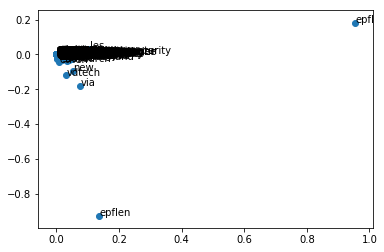

In [30]:
plt.scatter(term_vecs_freq[:, 0], term_vecs_freq[:, 1])
for i, t in enumerate(vocab_freq):
    plt.annotate(t, (term_vecs_freq[i, 0], term_vecs_freq[i, 1]))
plt.show()

## Question 3.2: Explain the scatter plot

epfl and epflen are two Twitter handles of EPFL which explains why the two principal concepts are mainly made up of these terms.

# Distributed Information Systems

***Final Exam, Fall Semester, 2021***

The exam will be held on your computer, but digital communication with other persons by any means is **strictly prohibited**.
The following materials are also allowed: exercise sheets and solutions, past exams with your own solution, personally written notes and personally collected documentation. You may also use Stackoverflow and Python documentation for questions related to Python programming.
By participating in this exam you **agree to these conditions**.

These are the instructions for the exam:

- You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
- The quiz will remain open **only for the first 2 hours** of the exam to avoid network congestion.
- **30 minutes** before the end of the exam we will announce a password to upload your jupyter notebook on **Moodle**.
- It is not recommended to leave the exam before the password is published. If you need to leave earlier, contact us.
- **You must follow the EPFL guidelines and wear your mask when you enter, leave, and move around the exam room.**
- **You have to wear the bracelet for COVID certification at all times.**
- **We would also like to kindly ask you to wear your mask when you ask questions and when we check your camipro card.**

## 0 Rename your Notebook
Replace SciperNo with your **personal SCIPER Number**.

## 1 [Multiple Choice Questions]()
**Password**: 

## 2 Theory Question

*(5 sub-questions)*

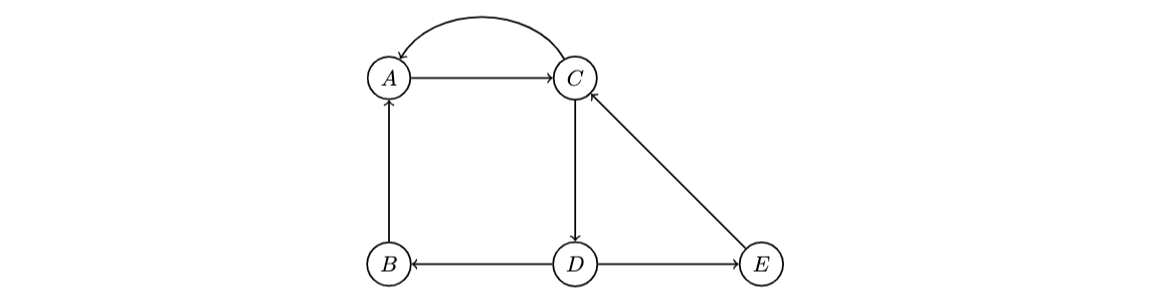

Answer the questions regarding the graph above. You can do the computations either by hand or by using computer.

> **1. You are going to run Pagerank on this graph. What is the link matrix? What does it become after normalizing by the node degrees? (Please explicitly state what do the rows and the columns indicate.)**

> **2. Run Pagerank without teleporting for two iterations. What are the final pagerank scores and the ranking? Show your work. You can assume all pages initially have a pagerank score of 1. Hint: Do not forget to normalize pagerank scores so that they will add up to 1 after each iteration.**

> **3. Suppose that the edge (E, C) did not exist. What would be the final ranking?** 

> **4. Run Personalized Pagerank with teleporting probability of 1/5. Random jumps are always to node A. Iterate only once. What are the final scores and the ranking?**

> **5. Imagine a new node is connected to the network by a single edge directed to A. How this would affect the result of 2 and 4?**

## 3 News recommendation

You will create news recommendations for the small news portal aggregator, "*allabouthealthcare.com*", regarding news about healthcare. In this website users can read various news articles regarding healthcare collected from popular healthcare media. 

The developers of the website collect analytics regarding which user has read what article. You are hired to create a recommendation engine that will provide news recommendations to users.

You will first explore the dataset by providing dataset descriptive statistics, and then you will implement various methods for news recommendation.

#### DATASET
You are given two files regarding the news articles consumption of this news portal. 

> 1. **News articles** (*news_articles.txt*): 
>
> This dataset contains information about the news articles collected by the portal.
> The information stored for each article is the following:
>
> - **article id**: The id of the article.
> - **title**: The title of the article.
- **medium**: The news portal the the article was originally published.
- **publish date**: The date of publication of the article.
- **authors**: The names and surnames of authors seperated with comma.
- **corpus**: The main text of the article without any identation.
- **url**: The url of the article.

> 2. **User log** (*user_log.txt*)
>
> This dataset contains the user log of *allabouthealthcare.com*. 
> The information stored for each row is the following:
>
> - **user id**: The id of the user.
- **article id**: The id of the article the user read.


### 3.1 Understanding the dataset
*(5 sub-questions)*

You need to compute the following descriptive statistics for the aforementioned dataset.

In [15]:
# import libraries
import pandas as pd
import numpy as np

# read the dataset
articles = pd.read_csv('data/news_articles.txt', sep='|').fillna('')
log = pd.read_csv('data/user_log.txt', sep='|')

In [16]:
articles.head()

,article_id,title,medium,publish_date,authors,corpus,url
0,0,how address inequity healthcare ai hire divers...,www.healthcareitnews.com,2022-01-13T09:05:39-05:00,Kat Jercich,even artificial intelligence become thoroughly...,https://www.healthcareitnews.com/news/how-addr...
1,1,cyberattack red cross endangers confidential i...,www.healthcareitnews.com,2022-01-21T12:06:48-05:00,Kat Jercich,the red cross reported week cyberattack contra...,https://www.healthcareitnews.com/news/cyber-at...
2,2,like banks healthcare become zoom healthcare l...,www.healthcareitnews.com,2022-01-20T12:43:10-05:00,Bill Siwicki,digital transformation topic jour healthcare t...,https://www.healthcareitnews.com/news/banks-he...
3,3,why voice recognition new competitive battlegr...,www.healthcareitnews.com,2022-01-20T12:24:54-05:00,Paddy Padmanabhan,for watching based artificial intelligence too...,https://www.healthcareitnews.com/blog/why-voic...
4,4,biden team regroups court loss covid,www.modernhealthcare.com,2022-01-14T17:30:38-05:00,Associated Press,concerned giving president joe biden anxiously...,https://www.modernhealthcare.com/politics-poli...


In [17]:
log.head()

,user_id,article_id
0,0,0
1,0,1
2,0,2
3,0,4
4,0,13


> **3.1.1. Compute the top 20 word occurencies from the corpora of all the articles (provide the result sorted)**

In [18]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
articles['corpus'].str.split(expand=True).stack().value_counts().rename_axis('word').reset_index(name='counts')[:20]
# ---------------------------------------------------

,word,counts
0,said,131
1,health,118
2,healthcare,105
3,the,96
4,patients,59
5,people,49
6,new,43
7,covid,42
8,data,41
9,it,41


> **3.1.2. Compute the top 3 most published media (provide the result sorted)**

In [19]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
articles['medium'].value_counts().rename_axis('medium').reset_index(name='counts')
# ---------------------------------------------------

,medium,counts
0,www.bbc.com,13
1,www.fiercehealthcare.com,8
2,www.modernhealthcare.com,5
3,www.healthcareitnews.com,4


> **3.1.3. Compute the percentage of articles that are writen by only one author**

In [20]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
articles['authors'].apply(lambda x: 1 if len(x.split(','))==1 else 0).sum()/ articles['authors'].count()
# ---------------------------------------------------

0.9

> **3.1.4. Compute the top 3 most active users**

In [21]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
log['user_id'].value_counts().rename_axis('user id').reset_index(name='counts')[:3]
# ---------------------------------------------------

,user id,counts
0,2,12
1,0,12
2,1,11


> **3.1.5. Compute the top 5 most read news articles**

In [22]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
log['article_id'].value_counts().rename_axis('article id').reset_index(name='counts')[:5]
# ---------------------------------------------------

,article id,counts
0,4,4
1,6,3
2,7,3
3,8,3
4,9,3


### 3.2 Item-based collaborative filtering
*(3 sub-questions)*

Now that we have prepared the data, our next mission is to create a recommender system following the paradigm of Item-based Collaborative Filtering. In this case, this is translated into "Users who read this news article also read …".


In order to make predictions, we will apply the following formula, where 
$N_I(a)$ is the set of neighbors of article $a_1$, and $a_2$ is an article viewed by user $x$.


\begin{equation}
{r}_{x}(a_1) =  \frac{\sum\limits_{a_2 \in N_{I}(a_1)} sim(a_1, a_2) r_{x}(a_2)}{\sum\limits_{a_2 \in N_{I}(a_1)}|sim(a_1, a_2)|}
\end{equation}


> **3.2.1 Compute the user-article matrix which should be a 2D numpy array, with each row corresponding to a user and each column to an article. The value of its cell indicates whether the user has read the corresponding article.**

In [23]:
n_users = len(log['user_id'].unique())
n_items= len(articles)

user_article = np.zeros((n_users, n_items))

# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# add 1 in data_matrix for each article a user has read
for ui, user_id in enumerate(user_article):
    for ai, article_id in enumerate(user_id):
        if len(log[(log['user_id']==ui) & (log['article_id']==ai)]):
            user_article[ui][ai] = 1
# ---------------------------------------------------

user_article

array([[1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

> **3.2.2 Compute the similarity matrix using cosine similarity metric**

In [24]:
# magnitude = sqrt(x2 + y2 + z2 + ...)
user_article_df = pd.DataFrame(user_article)
magnitude = np.sqrt(np.square(user_article_df).sum(axis=1))

# unitvector = (x / magnitude, y / magnitude, z / magnitude, ...)
user_article_df = user_article_df.divide(magnitude, axis='index')
user_article_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.288675,0.288675,0.288675,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.288675,0.288675,0.288675,0.288675,0.000000,0.0,0.288675,0.288675,0.0
1,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.301511,0.0,0.301511,0.301511,0.0
2,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.288675,0.288675,0.288675,0.288675,...,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248,0.408248,0.408248,0.408248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(data_items):
    """
    Calculate the column-wise cosine similarity for a sparse
    matrix.
    Return a new dataframe matrix with similarities.
    """
    # PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
    from scipy import sparse
    
    data_sparse = sparse.csr_matrix(data_items)
    print(data_items.shape)
    print(data_sparse.shape)
    similarities = cosine_similarity(data_sparse.transpose())
    print(similarities.shape)
    sim = pd.DataFrame(data=similarities, index= data_items.columns, columns= data_items.columns)
    return sim
    # ---------------------------------------------------

# Build the similarity matrix
similarity_matrix = calculate_similarity(user_article_df)

# Lets get the top 5 similar articles for article with id 4
similarity_matrix.iloc[4].nlargest(5)

(5, 30)
(5, 30)
(30, 30)


4    1.000000
6    0.901388
7    0.901388
8    0.901388
9    0.901388
Name: 4, dtype: float64

> **3.2.3 Predict the top 5 recommendations for the user with id 4 using item-based collaborative filtering**

In [26]:
user_id = 4 # The id of the user for whom we want to generate recommendations

# Get the articles the user has read.
user_articles = list(log[log['user_id']==user_id]['article_id'].unique())

# User article log
user_article_log_vector = user_article_df.iloc[user_id]
user_articles

[4, 6, 7, 8, 9, 10]

In [27]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Calculate the score.
score = similarity_matrix.dot(user_article_log_vector).div(similarity_matrix.sum(axis=1))

# Remove the known likes from the recommendation.
score = score.drop(user_articles)
score
# ---------------------------------------------------

0     0.009145
1     0.009145
2     0.009145
3     0.000000
5     0.000000
11    0.000000
12    0.000000
13    0.009145
14    0.190211
15    0.018448
16    0.190211
17    0.190211
18    0.148400
19    0.148400
20    0.148400
21    0.018448
22    0.018448
23    0.018448
24    0.018448
25    0.000000
26         NaN
27    0.009145
28    0.009145
29         NaN
dtype: float64

In [28]:
print(type(score))

<class 'pandas.core.series.Series'>


In [14]:
# Print the known likes and the top 5 recommendations.
score.nlargest(10)

14    0.190211
16    0.190211
17    0.190211
18    0.148400
19    0.148400
20    0.148400
15    0.018448
21    0.018448
22    0.018448
23    0.018448
dtype: float64

# 3.3 Content-based recommendations
*(6 sub-questions)*

The next mission we have is to create a recommender system following the paradigm of the Content-based recommendation approach. In this case, we will also exploit information related to the content of the articles.

As a first step, we will compute the tf-idf weights of the articles.

\begin{equation}
w(t, a) = tf(t, a) \cdot idf(t) = \frac{freq(t, a)}{\max_{s\in T} freq(s, a)} \cdot log(\frac{N}{n(t)})
\end{equation}

Then in order to do predictions, we need to estimate the probability of article $a$ not yet seen by user $x$. To do so, we find the nearest neighbours of $a$ in the subset of articles that have been already seen by the user $x$.

\begin{equation}
r_x(a_1) = \frac{\sum_{a_2\in N_I(a_1)} sim(a_1, a_2) \cdot r_x(a_2)}{\sum_{a_2\in N_I(a_1)} |sim(a_1, a_2)|}
\end{equation}


Find the articles with the most Knn's that are present in the history of the user, aka find the articles that are most similar to the articles that the user has already seen.
- for articles not read by user
- get recommendations
- rank the articles based on the amount of articles present in the "already seen" list of the user


> **3.3.1 Compute tf-idf values for the main corpus of the articles and print the shape of the final matrix**

In [15]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=2, stop_words='english')
# vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(articles['corpus'])
tf_idf_matrix = tf_idf.toarray()
tf_idf_matrix.shape
# ---------------------------------------------------

(30, 945)

> **3.3.2 Create the vocabulary of all the articles (as a list) and print the 5 most common words**

In [16]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
vocabulary_df = articles['corpus'].str.split(expand=True).stack().value_counts().rename_axis('word').reset_index(name='counts')
vocabulary = vocabulary_df['word'].tolist()
vocabulary.sort()
vocabulary_df[:5]
# ---------------------------------------------------

,word,counts
0,said,131
1,health,118
2,healthcare,105
3,the,96
4,patients,59


> **3.3.3 Find the term with highest TF-IDF value for the article with id 4.**

In [17]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
max_tf = 0
max_id = None
for i, word_tf in enumerate(tf_idf_matrix[5]):
    if word_tf > max_tf:
        max_tf = word_tf
        max_id = i

vocabulary[max_id]
# ---------------------------------------------------

'capacity'

> **3.3.4 Create a function that finds the best 5 recommendations for any given article and print the best 5 recommendations for article with id 4**

In [18]:
def get_recommendations(i, similarities, k=5):
    """
    Recommends articles based on a similarity dataframe
    Parameters
    ----------
    i : int
        Article index of the similarity dataframe
    similarities : pd.DataFrame
        Similarity dataframe, symmetric, with articles as indices and columns
    k : int
        Amount of recommendations to return
    Returns
    -------
    pd.DataFrame with the top k recommendations
    """
    # PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
    ix = similarities.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = similarities.columns[ix[-1:-(k+2):-1]]
    closest = list(closest.drop(i, errors='ignore'))
    return articles[articles['article_id'].isin(list(closest))]
    # ---------------------------------------------------

# create similarity
cosine_sim = cosine_similarity(tf_idf_matrix)

# get recommendations for article with id 4
corpus_id_4 = articles[articles['article_id']==4]['corpus'].values[0]
get_recommendations(4, pd.DataFrame(cosine_sim))

,article_id,title,medium,publish_date,authors,corpus,url
7,7,covid surge undermining health problems,www.modernhealthcare.com,2022-01-21T11:35:21-05:00,Associated Press,he told later i assumed forgot said gleason wo...,https://www.modernhealthcare.com/safety-qualit...
8,8,patient beware some states still pushing ineff...,www.modernhealthcare.com,2022-01-21T09:18:29-05:00,"JoNel Aleccia, Kaiser Health News",as covid variant completes sweep across states...,https://www.modernhealthcare.com/safety-qualit...
15,15,us supreme court blocks biden workplace vaccin...,www.bbc.com,2022-01-14T03:31:15.000Z,Natalie Sherman,he added i call business leaders immediately j...,https://www.bbc.com/news/world-us-canada-59989476
20,20,covid austrian parliament approves mandatory v...,www.bbc.com,2022-01-20T22:52:08.000Z,,the law due effect february would make austria...,https://www.bbc.com/news/world-europe-60077767
29,29,fierce jpm week cityblock ajayi build covid sp...,www.fiercehealthcare.com,"Jan 20, 2022 4:30pm",Paige Minemyer,one major lessons pandemic we interconnected i...,https://www.fiercehealthcare.com/practices/fie...


> **3.3.5 Find the articles that user with id 4 has NOT yet read and print the count of them**

In [19]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
article_to_recommend = articles[~articles['article_id'].isin(list(log[log['user_id']==4]['article_id'].unique()))]
len(article_to_recommend)
# ---------------------------------------------------

24

> **3.3.6 Predict top 5 recommendations for user with id 4**

In [20]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
user_articles = articles[articles['article_id'].isin(list(log[log['user_id']==4]['article_id'].unique()))]

# get recommendations
article_ids_to_recommend = article_to_recommend.index.to_list()
user_articles_ids = user_articles.index.to_list()

scores = list()
for i in article_ids_to_recommend:
    # get predictions for this article
    recommendations = get_recommendations(i, pd.DataFrame(cosine_sim)).index.to_list()
    common_elements = len(set(user_articles_ids).intersection(recommendations))
    scores.append((i, common_elements))

pd.DataFrame(scores, columns=['article_id', 'score']).sort_values(by=['score'], ascending=False).iloc[:5]
# ---------------------------------------------------

,article_id,score
12,18,4
7,13,3
22,28,3
21,27,3
14,20,3


### 3.4 Association rules
*(3 sub-questions)*

Now we would like to identify frequent rules that govern how words appear together in the news article **titles**.

We provide every observed pair of words containing "covid" (we only consider rules of size 2).

* Compute **support** and **confidence** for the rules X -> covid, where X is a word appearing with covid in the given set of pairs.
* From the confidence of the rules you obtained, compute **lift**.
* Show the 5 rules with **highest confidence** and the 5 rules with **highest lift** with the provided code. 

In [21]:
titles = articles['title'].apply(lambda x: x.lower().split(' '))

> **3.4.1 Compute support and confidence for the rules X -> covid, where X is a word appearing with covid in an article.**

In [22]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# support    = {# your code here}
# confidence = {# your code here}
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(articles['title'])
titles_voc = vectorizer.get_feature_names()
titles_voc.remove('covid')

support    = dict()
confidence = dict()

for word in titles_voc:
    articles_with_both = 0
    articles_with_word = 0
    for title in titles:
        if word in title:
            articles_with_word +=1
            if 'covid' in title:
                articles_with_both +=1
    support[word] = articles_with_both/ len(titles)
    confidence[word] = articles_with_both / articles_with_word
# ---------------------------------------------------

> **3.4.2 From the confidence of the rules you obtained, compute lift.**

In [23]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# lift = {# your code here}
lift = dict()
support_covid = [1 if 'covid' in title else 0 for title in titles].count(1)
for word in titles_voc:
    support_word = [1 if word in title else 0 for title in titles].count(1)
    lift[word] = support[word] / (support_word * support_covid)
# ---------------------------------------------------

> **3.4.3 Show the 5 rules with highest confidence and the 5 rules with highest lift with the provided code.**

In [24]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Print confidence
{k: v for k, v in sorted(confidence.items(), key=lambda item: item[1], reverse=True)[:5]}

{'africa': 1.0, 'ajayi': 1.0, 'america': 1.0, 'amid': 1.0, 'antibody': 1.0}

In [25]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Print lift
{k: v for k, v in sorted(lift.items(), key=lambda item: item[1], reverse=True)[:5]}

{'africa': 0.002564102564102564,
 'ajayi': 0.002564102564102564,
 'america': 0.002564102564102564,
 'amid': 0.002564102564102564,
 'antibody': 0.002564102564102564}

## 4 [Submit your notebook]()

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Distributed-Information-Systems" data-toc-modified-id="Distributed-Information-Systems-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Distributed Information Systems</a></span></li><li><span><a href="#Rename-your-notebook" data-toc-modified-id="Rename-your-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Rename your notebook</a></span></li><li><span><a href="#Word-Representation-for-Concept-Identification" data-toc-modified-id="Word-Representation-for-Concept-Identification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word Representation for Concept Identification</a></span><ul class="toc-item"><li><span><a href="#Build-the-vocabulary-by-selecting-top-k-frequent-words" data-toc-modified-id="Build-the-vocabulary-by-selecting-top-k-frequent-words-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Build the vocabulary by selecting top-k frequent words</a></span></li><li><span><a href="#Construct-the-word-cooccurence-matrix" data-toc-modified-id="Construct-the-word-cooccurence-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Construct the word cooccurence matrix</a></span></li><li><span><a href="#Perform-SVD-on-the-matrix-and-select-the-largest-singular-values" data-toc-modified-id="Perform-SVD-on-the-matrix-and-select-the-largest-singular-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Perform SVD on the matrix and select the largest singular values</a></span></li></ul></li><li><span><a href="#Vector-based-retrieval-using-Word-representations" data-toc-modified-id="Vector-based-retrieval-using-Word-representations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vector-based retrieval using Word representations</a></span><ul class="toc-item"><li><span><a href="#Document-and-query-vectors-from-word-representations" data-toc-modified-id="Document-and-query-vectors-from-word-representations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Document and query vectors from word representations</a></span></li><li><span><a href="#Retrieve-top-10-relevant-documents" data-toc-modified-id="Retrieve-top-10-relevant-documents-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Retrieve top-10 relevant documents</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Evaluate-retrieval-result-using-DCG" data-toc-modified-id="Evaluate-retrieval-result-using-DCG-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluate retrieval result using DCG</a></span></li><li><span><a href="#Explain-the-DCG-values-plot" data-toc-modified-id="Explain-the-DCG-values-plot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explain the DCG values plot</a></span></li></ul></li><li><span><a href="#Submit-your-notebook" data-toc-modified-id="Submit-your-notebook-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Submit your notebook</a></span></li></ul></div>

# Distributed Information Systems
***Midterm Exam, Winter Semester 2021-2022***

The following materials are allowed: exercise sheets and solutions, past exams with your own solution, personally written notes and personally collected documentation.

The exam will be held on your computer, but digital communication by any means is strictly prohibited. 
By participating to this exam you agree to these conditions.

These are the instructions for the exam:

1. You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
* We will publish 15 minutes before the end of the exam a password for uploading your solutions on Moodle.
* It is not recommended to leave the exam before the password is published. If you need to leave earlier, contact us.

# Rename your notebook
Replace SciperNo with your **personal SCIPER Number**.

In [2]:
#Required libraries
import math
import os
import string
from collections import defaultdict
from operator import itemgetter
from pprint import pprint

import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')).union(set(stopwords.words('french')))

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def read_corpus():
    '''Reads corpus from files.'''
    
    documents = []
    orig_docs = []
    DIR = './'
    tknzr = TweetTokenizer()
    with open("epfldocs.txt", encoding = "utf-8") as f:
        content = f.readlines()
    for text in content:
        orig_docs.append(text)
        # split into words
        tokens = tknzr.tokenize(text)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # filter out stop words
        words = [w for w in words if not w in stop_words]

        documents.append(' '.join(words))
    return documents, orig_docs

documents, orig_docs = read_corpus()

In [4]:
assert(len(documents) == 1075)

# Word Representation for Concept Identification

We will build word representations in a latent concept space using SVD. Differently to Latent Semantic Indexing (LSI) we will derive the latent concepts space from the **word co-occurrence matrix** (and not from the term-document matrix, as in standard LSI).

An entry (i,j) in the word co-occurrence matrix corresponds to the number of times the word i co-occurs with the word j in the context of word i. The context of the words consist of the words preceding or succeeding the word in the text.  

By deriving an SVD from the word co-occurrence matrix, and selecting the top dimensions of the latent space, we obtain a word representation as vectors over a concept space. Commonly such word representations are also called word embeddings.
 

## Build the vocabulary by selecting top-k frequent words
No code is required for this part.

In [5]:
# vocabulary is the list of all words
# vocabulary_to_index maps words to their index

def create_vocabulary_frequency(corpus, vocab_len):
    '''Select top-k (k = vocab_len) words in term of frequencies as vocabulary'''
    vocabulary_to_index = {}
    count = defaultdict(int)
    for document in corpus:
        for word in document.split():
                count[word] += 1
    
    sorted_count_by_freq = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

    vocabulary = []
    for i, x in enumerate(sorted_count_by_freq[:vocab_len]):
        vocabulary.append(x[0])
        vocabulary_to_index[x[0]] = i
    return vocabulary, vocabulary_to_index

vocab_freq, vocabulary_to_index = create_vocabulary_frequency(documents, 5000)

## Construct the word cooccurence matrix

In this question, you need to construct the word co-occurence matrix, given the vocabulary and the set of documents.

The value of a cell (i,j) is the number of times the word i co-occurs with the word j in the context of word i.

For this question, a word $w_i$ cooccurs with a word $w_j$ in the context of word $w_i$ if $w_j$ preceeds or succeeds $w_i$ with a distance **at most 2**.

Example: For this document "*how to bake bread without bake recip*", the words coocur with the word "*bread*" are "*to, bake, without, bake*".

Make sure that you consider only words that appear in the vocabulary.

In [6]:
def construct_word_cooccurence_matrix(vocabulary_to_index, documents, k=2):
    matrix = np.zeros((len(vocabulary_to_index), len(vocabulary_to_index)))
    for document in documents:
        terms = document.split()
        for ind, term_i in enumerate(terms):
            if term_i in vocabulary_to_index:
                for context_ind in range(max(0, ind-2), min(len(terms), ind+3)):
                    if context_ind != ind and terms[context_ind] in vocabulary_to_index:
                        matrix[vocabulary_to_index[term_i], vocabulary_to_index[terms[context_ind]]] += 1
    return matrix

word_cooccur_matrix = construct_word_cooccurence_matrix(vocabulary_to_index, documents)

You can optionally check whether the matrix you constructed is correct using the following code:

In [7]:
assert_matrix = False
if assert_matrix:
    word_coor_mat = np.load("word_coocur_matrix.npy")
    assert(word_coor_mat == word_cooccur_matrix[:100,:100]).all()

## Perform SVD on the matrix and select the largest singular values 

We perform SVD on the matrix $\mathbf{M} = \mathbf{K}\mathbf{S}\mathbf{D}^T$ and select the first 128 largest singular values.

Then, we can use the submatrix $\mathbf{K_s}$, corresponding to the largest singular values, as the word representation matrix. 

Hint 1 : Are the words represented in $\mathbf{K_s}$ as rows or columns?

Hint 2: np.linalg.svd(M, full_matrices=False) performs SVD on the matrix $\mathbf{M}$ and returns $\mathbf{K}, \mathbf{S}, \mathbf{D}^T$

 -  $\mathbf{K}, \mathbf{D}^T$ are matrices with orthonormal columns
 -  $\mathbf{S}$ is a **vector** of singular values in a **descending** order
 
Hint 3: np.diag(V) converts a vector to a diagonal matrix

Hint 4: To select:
 - the first k rows of a matrix A, use A[0:k, :]
 - the first k columns of a matrix A, use A[:, 0:k]
 - the submatrix from first k rows and k columns of a matrix A, use A[0:k, 0:k]

In [8]:
# Input: a word coocurrence matrix and the number of singular values that will be selected
# Output: K_s, S_s, Dt_s are similar to the defintion in the lecture

def truncated_svd(word_cooccur_matrix, num_val):
    # The following may take 1-2 minutes since we are decomposing a matrix of size 5000x1075
    K, S, Dt = np.linalg.svd(word_cooccur_matrix, full_matrices=False) 
    
    K_sel = K[:, :num_val]
    S_sel = np.diag(S)[:num_val, :num_val]
    Dt_sel = Dt[:num_val, :]
    return K_sel, S_sel, Dt_sel

K_s, S_s, Dt_s = truncated_svd(word_cooccur_matrix,128)

# Vector-based retrieval using Word representations



## Document and query vectors from word representations

For each document and query, we construct the corresponding vector by **averaging** its word representations.

Hint: not all words are in the vocabulary!

In [9]:
def get_doc_vecs(documents, word_embedding_matrix, vocabulary_to_index):
    doc_vecs = np.zeros((len(documents), word_embedding_matrix.shape[1]))

    w_emb = lambda w: word_embedding_matrix[vocabulary_to_index[w]] if w in vocabulary_to_index else np.zeros((word_embedding_matrix.shape[1]))
    d_emb = lambda d: np.average(list(map(w_emb, d.split()+[''])), axis=0)

    doc_vecs = np.stack(list(map(d_emb, documents)), axis=0)
    
    return doc_vecs

doc_vecs = get_doc_vecs(documents, K_s, vocabulary_to_index)

## Retrieve top-10 relevant documents

Retrieve top-10 relevant documents for the query "*computer science*"

Hint: you may use the function get_doc_vecs

In [10]:
query = "computer science"

query_vec = get_doc_vecs([query], K_s, vocabulary_to_index)[0]

In [11]:
def cosine_similarity(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy*1.0/math.sqrt(sumxx*sumyy)

def retrieve_documents(doc_vecs, query_vec, top_k):
    scores = [[cosine_similarity(query_vec, doc_vecs[d,:]), d] for d in range(len(documents))]
    scores.sort(key=lambda x: -x[0])
    doc_ids = []
    retrieved = []
    for i in range(top_k):
        doc_ids.append(scores[i][1])
        retrieved.append(orig_docs[scores[i][1]])
    return doc_ids, retrieved

retrieved_ids, retrieved_docs = retrieve_documents(doc_vecs, query_vec, top_k=10)

/Users/smeros/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


# Evaluation
We consider the scikit reference code as an “oracle” that supposedly gives the correct result. 

In [12]:
# Retrieval oracle 
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), vocabulary=vocab_freq, min_df = 1, stop_words = 'english')
features = tf.fit_transform(documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, features, threshold=0.1):
    new_features = tf.transform([query])
    cosine_similarities = linear_kernel(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold:
            break
        doc_ids.append(related_docs_indices[i])
    return doc_ids

# gt_ids are the document ids retrieved by the oracle
gt_ids = search_vec_sklearn(query, features)

We also assume that there is a user that has done the grading of all the documents according to their relevance. 
The top-10 results using scikit-learn have grade 3, the next 10 results have grade 2, 
the rest in the list has grade 1 while non-relevant results have grade 0.

In [13]:
grade = []
for i in range(len(documents)):
    if i in gt_ids[:10]:
        grade.append(3)
    elif i in gt_ids[10:20]:
        grade.append(2)
    elif i in gt_ids[20:]:
        grade.append(1)
    else:
        grade.append(0)

## Evaluate retrieval result using DCG 

Discounted Cumulative Gain (DCG) is a retrieval metric that also takes into account the ordering of the result. 

The DCG accumulated at a rank $k$ is defined as:

$DCG_k = \sum_{i=1}^k \frac{grade[i]}{log_2(i+1)}$

where $grade[i]$ is the relevance score given by the user for the result at position $i$.

Hint: the logarithm is computed using the function np.log2

In [14]:
def dcg(k, retrieved_ids, grade):
    dcg_val = 0
    for i in range(1, k):
        dcg_val += grade[i] / math.log2(i+1)
    return dcg_val

We compute the DCG for the top-1 to the top-10 retrieval results and we plot the values.

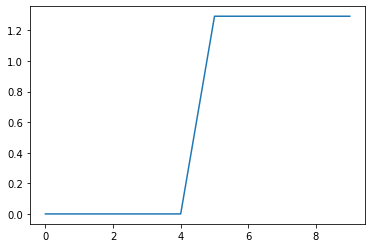

In [15]:
vals = []
for i in range(10):
    val = dcg(i, retrieved_ids, grade)
    vals.append(val)
    
plt.plot(vals)

## Explain the DCG values plot

# Submit your notebook

Go to [Moodle](https://moodle.epfl.ch/course/view.php?id=4051) > Exams > Midterm and follow the instructions.


# 📘 DIS Final Exam - Fall 2022

**🎉 Welcome to DIS Final exam that takes place on the 1st of February 2023 from 15:00 to 18:00.**

> Please fill the following info:
> - Your Name: 
> - Your SCIPER:

## Answer all the parts of the exam:

- [PART 0: Rename your notebook with your SciperNo](#part0)

- [PART 1: Multiple Choice Questions - Quiz](#part1)

- [PART 2: Theory questions](#part2)

- [PART 3: Programming exercise](#part3)

    - [3.1: Parse and understand the data](#part31)
        - 3.1.1 Create the vocabulary of the documents

    - [3.2: Encode documents with Vector Space Retrieval](#part32)
        - 3.2.1 Build the term-frequency matrix.
        - 3.2.2 Build the inverse document-frequency matrix
        - 3.2.3 Vectorize input with Vector Space Model

    - [3.3: k-Nearest-Neighbors (kNN)](#part33)
        - 3.3.1 Implement kNN function
        - 3.3.2 Print k=10 closests documents to the given query
        - 3.3.3 Implement probabilistic and weigting estimation of kNN
        - 3.3.4 Compute weighting and probabilistic estimation of the given query
        - 3.3.5 Implement a Rocchio classifier
        - 3.3.6 Compute Rocchio estimation of the given query

    - [3.4: Naive Bayes Classifier](#part34)
        - 3.4.1 Compute the Naive Bayes estimation for the given query
        - 3.4.2 Discuss the difference the above classifers

    - [3.5: Association rules](#part35)
        - 3.5.1 Compute support and confidence
        - 3.5.2 Compute lift
        - 3.5.3 Explanation of implemented metrics
        
- [SUBMIT EXAM](#submit)

# 🍀 GOOD LUCK 🍀

<a id='part0'></a>
## PART 0: Rename your notebook with your SciperNo

The final sumbitted file should have the following name: `SciperNo.ipynb`

<a id='part1'></a>
## PART 1: [Multiple Choice Questions - Quiz](https://moodle.epfl.ch/mod/quiz/view.php?id=1235302)

<a id='part2'></a>
## PART 2: Theory Questions

**Given a document collection with a vocabulary consisting of three words, $V = {a,b,c}$, and two documents $d_1$ = aabc and $d_2 = abc$. The query is $q = ab$.**

> **2.1. Using standard vector space retrieval, is it possible to enforce both a ranking $d_1 > d_2$ and $d_2 > d_1$ by adding suitable documents to the collection. If yes, give examples of such documents to be added, if no, provide an argument why this cannot be the case.**

**➡️ PLEASE WRITE YOUR ANSWER HERE**

Yes, it is possible.

    d1>d2: adding d3=”b”
    d2>d1: adding d3=”c”


> **2.2. Using smoothed probabilistic retrieval (with $\lambda=0.5$), is it possible to enforce both a ranking $d_1 > d_2$ and $d_2 > d_1$ by adding suitable documents to the collection. If yes, give examples of such documents to be added, if no, provide an argument why this cannot be the case.**


**➡️ PLEASE WRITE YOUR ANSWER HERE**

Yes, it is possible.

    d1>d2: without adding any document, it holds true
    d2>d1: adding d3=”aaaa”


> **2.3. Is it possible to enforce a ranking $d_2 > d_1$ with vector space retrieval and $d_1 > d_2$ with probabilistic retrieval ($\lambda=0.5$), by adding the same documents to the collection? If yes, give examples of such documents to be added, if no, provide an argument why this cannot be the case.**

**➡️ PLEASE WRITE YOUR ANSWER HERE**

Yes, it is possible. Adding a document like d3=”c” would make d2>d1 for   VSR and d1>d2 for smoothed probabilistic retrieval.

<a id='part3'></a>
## PART 3: Programming exercise

### 💡 THE BACKSTORY

You are given a "news topic classification" dataset (`data.csv`), and the task is to apply document classification techniques you've learned during the semester. The goal is to classify news articles based on the topic they refer to.

### 📰 THE DATA

This dataset contains ~7000 samples of news articles which consists of 3 columns:

The first column is `label`, the second is `title` and the third is `description`.

The topic labels are numbered 1-4 where `1` represents topic **"World"**, `2` represents topic **"Sports"**, `3` represents **"Business"** and `4` represents **"Sci/Tech"**.

| Column     | Description                   |
|------------|-------------------------------|
| **label**  | The topic label/topic id of the article|
| **title**  | The title of the article |
| **description**  | The description of the article |


### ✅ THE TASK

You need to build a KNN and a Naive Bayes classifer to classify the articles into the 4 different categories.

<a id='part31'></a>
### 3.1: Parse and understand the data

*(1 sub-question)*

In [1]:
# Import libraries- you can additionally import any library you want.
import pandas as pd
import numpy as np
from collections import Counter
import math
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/foroutan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/foroutan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of news articles:  6994


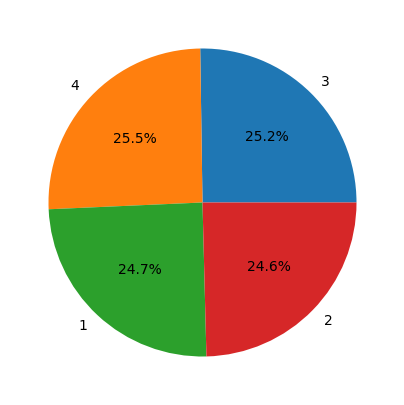

In [4]:
# Read a list of documents from a file. Each line in a file is a document
data_path = "data.csv"
data = pd.read_csv(data_path)
print("Number of news articles: ", len(data))

# Plot the distribution of topics
labels = data.label.unique()
sizes = [Counter(data.label)[i] for i in labels]
plt.figure( figsize=(5,5) )
plt.pie(sizes ,  labels=labels , autopct='%1.1f%%')
plt.show()

In [5]:
# Utility functions - NOTHING TO CHANGE HERE
stemmer = PorterStemmer()

# Tokenize, stem a document
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    return " ".join([stemmer.stem(word.lower()) for word in tokens if word not in stopwords.words('english')])

# Preprocess articles
def preprocess_text(documents):
    docs = list()
    for doc in documents:
        docs.append(tokenize(doc).split())  # tokenize
    return docs

In [6]:
# Tokenize titles of the articles 
original_documents = [doc["title"].strip() for _, doc in data.iterrows()]
tokenized_documents = preprocess_text(original_documents)
documents_topics = list(data.label)

> #### 3.1.1 Create the vocabulary of the articles.

In [7]:
def get_vocabulary_frequency(documents):
    """
    It parses the input documents and creates a dictionary with the terms and term frequencies.
    
    INPUT:
    Doc1: hello hello world
    Doc2: hello friend
    
    OUTPUT:
    {'hello': 3,
    'world': 1,
    'friend': 1}

    :param documents: list of list of str, with the tokenized documents.
    :return: dict, with keys the words and values the frequency of each word.
    """
    vocabulary = dict()
    # --------------
    # YOUR CODE HERE
    
    for document in documents:
        for word in document:
            if word in vocabulary:
                vocabulary[word] += 1
            else:
                vocabulary[word] = 1

    # --------------
    return vocabulary

In [8]:
# Create the vocabulary
vocabulary = get_vocabulary_frequency(tokenized_documents)
f"Vocabulary Size: {len(vocabulary)}"

'Vocabulary Size: 8051'

In [9]:
# print the most frequent token
voc_sorted_keys = sorted(vocabulary, key=vocabulary.get, reverse=True)
print(f"{voc_sorted_keys[0]} : {vocabulary[voc_sorted_keys[0]]}")

us : 308


<a id='part32'></a>
### PART 3.2: Encode documents with Vector Space Retrieval

*(3 sub-questions)*

In this part, we will encode/vectorize the documents using the **Vector Space Model**. 
More specifically:
- we will compute the term-frequency matrix **(tf)**
- we will compute the inverse document frequency **(idf)**
- we will vectorize/encode the articles with **tf-idf**

> #### 3.2.1 Build the term-frequency matrix

In [10]:
def get_tf(documents, vocabulary):
    """
    It creates the term-frequency matrix with rows the terms of the vocabulary and columns the number of documents.
    Each value of the matrix represents the frequency (normalized to document max frequecy) of a term (row) 
    in a document (column).
    Example:
    
    > INPUT:
    documents:
    Doc1: hello hello world
    Doc2: hello friend
    
    voc: 
    [hello, world, friend]
    
    > OUPUT:    
    [[1, 1],
    [0.5, 0],
    [0, 1]]
    
    :param documents: list of list of str, with the tokenized documents.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: np.array with the document-term frequencies
    """
    document_term_freq = np.zeros(shape=(len(vocabulary), len(documents)))
    # --------------
    # YOUR CODE HERE
    for j, document in enumerate(documents):
        counter = Counter(document)
        max_count = counter.most_common(1)[0][1]
        for i, word in enumerate(vocabulary):
            if word in counter:
                document_term_freq[i,j] = counter[word] / max_count
    # --------------
    
    return document_term_freq

In [11]:
tf = get_tf(tokenized_documents, vocabulary)
tf.shape

(8051, 6994)

> #### 3.2.2 Build the inverse document-frequency matrix (idf)

In [12]:
# compute IDF, storing idf values in a dictionary
def get_idf(vocabulary, documents):
    """
    It computes IDF scores, storing idf values in a dictionary.
    
    :param documents: list of list of str, with the tokenized tweets.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: dict with the terms as keys and values the idf for each term.
    """
    # --------------
    # YOUR CODE HERE
    idf = dict()
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents/sum(term in document for document in documents), math.e)
    # --------------
    return idf


In [13]:
idf = get_idf(vocabulary, tokenized_documents)
len(idf)

8051

> #### 3.2.3 Vectorization of input with the Vector Space Model

In [14]:
# Function to generate the vector for a document (with normalisation)
def vectorize_vsr(document, vocabulary, idf):
    """
    It takes the input text and vectorizes it based on the tf-idf formula.
    
    :param document: list of str, with the tokenized document
    :param vocabulary: dict, with the vocabulary (computed in 1.1) and each term's frequency.
    :param idf: dict, with the terms as keys and values the idf for each term.
    :return: np.array, with the vectorized document
    """
    # --------------
    # YOUR CODE HERE
    vector = np.zeros(len(vocabulary))
    term_freq = Counter(document)
    max_freq = term_freq.most_common(1)[0][1]
    for i, term in enumerate(vocabulary):
        vector[i] = idf[term] * term_freq[term]/max_freq
    # --------------
    return vector
    
vectorized_documents = np.array([vectorize_vsr(s, vocabulary, idf)  for i, s in enumerate(tokenized_documents)])
vectorized_documents.shape

(6994, 8051)

<a id='part33'></a>
### PART 3.3: k-Nearest-Neighbors (kNN)

*(7 sub-questions)*




> #### 3.3.1 Implement kNN function (finding k nearest documents for a given document)

In [15]:
def cosine_similarity(v1, v2):
    """
    It computes cosine similarity.
    
    :param v1: list of floats, with the vector of a document.
    :param v2: list of floats, with the vector of a document.
    :return: float
    """
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxy == 0:
        sim = 0
    else:
        sim = sumxy/math.sqrt(sumxx*sumyy)
    return sim

def euclidean_distance(v1, v2):
    """ It computes the euclidean distance between to vectors.
    :param v1: First vector (numpy array).
    :param v2: Second vector (numpy array).
    :return: Euclidean distance (float)
    """
    return np.linalg.norm(v1 - v2)
    
def knn(doc_vectors, query_vector, k=10):
    """ It finds the `k` nearest documents to the given query (based on euclidean distance).
    :param doc_vectors: An array of document vectors (np.array(np.array)).
    :param query_vector: Query representation (np.array)
    :return: List of document indices (list(int))
    """
    # --------------
    # YOUR CODE HERE
    dist_scores = [(i, euclidean_distance(np.array(doc), np.array(query_vector))) for i, doc in enumerate(doc_vectors)]
    dist_scores = sorted(dist_scores, key=lambda a: a[1])
    top_k_docs = [i for i in list(zip(*dist_scores[0:k]))[0]]
    # --------------
    return top_k_docs



> #### 3.3.2 Print k=10 closests documents to the given query

In [16]:
query_title = "Tiny telescope's big discovery opens new doors" # label = 4

query = tokenize(query_title).split()
query_vectors = vectorize_vsr(query, vocabulary, idf)

top_k_docs = knn(vectorized_documents, query_vectors[0])

for k, doc_index in enumerate(top_k_docs):
    print(f"{k+1} : {original_documents[doc_index]}")

1 : Microsoft Patches the Patch
2 : SpaceShipOne: One down, one to go
3 : Oracle, PeopleSoft
4 : Olympics: Party, Party, Party - Greece's Parting Gift
5 : Oil, stocks both rise
6 : Names in the Game
7 : Missed target
8 : To finish first, first be Finnish
9 : Three into two
10 : How to keep oil flowing? Invest, invest, invest (AFP)


> #### 3.3.3 Implement probabilistic and weigting estimation of kNN 

In [17]:
def knn_weighting_estimate(doc_vectors, doc_labels, query_vector, k=10):
    """ Weighting estimation for kNN classification
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :param query_vector: Query vector (np.array)
    :param k: Number of nearest neighbors to retrieve
    
    :return: A dictionary containing the estimation (sorted) score for each label/topic (dict)
    """
    # --------------
    # YOUR CODE HERE
    top_k_doc_indices = knn(doc_vectors, query_vector, k)
    top_k_labels = [doc_labels[i] for i in top_k_doc_indices]

    scores = {t:0 for t in list(set(doc_labels))}
    for i in top_k_doc_indices:
        scores[doc_labels[i]] += cosine_similarity(query_vector, doc_vectors[i])
    # --------------
    return scores

def knn_probabilistic_estimate(doc_vectors, doc_labels, query_vector, k=10):
    """ Probabilistic estimation for kNN classification
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :param query_vector: Query vector (np.array)
    :param k: Number of nearest neighbors to retrieve
    
    :return: A dictionary containing the estimation (sorted) score for each label/topic (dict)
    """
    # --------------
    # YOUR CODE HERE
    top_k_doc_indices = knn(doc_vectors, query_vector, k)
    top_k_labels = [doc_labels[i] for i in top_k_doc_indices]

    scores = {t:0 for t in list(set(doc_labels))}
    for i in top_k_doc_indices:
        scores[doc_labels[i]] += 1

    scores = {t:scores[t] / k for t in scores}
    # --------------
    return scores


> #### 3.3.4 Compute weighting and probabilistic estimation of the given query

In [18]:
# query_titles = [("Hundreds laid off at Fleet offices", 3), ("Stuttgart Closing on Qualification", 2), ("Shoppach doesn't appear ready to hit the next level", 2)]
query_titles = [("Airlines Agree to Cut Flights at Chicago O'Hare", 3), ("Stuttgart Closing on Qualification", 2)]
# query_titles = [("After Wait, Google Set for Market Debut", 3), ("Stuttgart Closing on Qualification", 2)]
# query_titles = [("Republican Convention Light on Stars", 1)]
queries = [tokenize(q[0]).split() for q in query_titles] 
query_vectors = [vectorize_vsr(q, vocabulary, idf) for q in queries]
k = 10

for i, query_v in enumerate(query_vectors):
    print(f"Query: {query_titles[i]}")
    w_estimate = knn_weighting_estimate(vectorized_documents, documents_topics, query_v, k)
    w_estimate = sorted(w_estimate.items(), key=lambda x: x[1], reverse=True)
    print(f"Weighting estimate: {w_estimate}")
   
    prob_estimate = knn_probabilistic_estimate(vectorized_documents, documents_topics, query_v, k)
    prob_estimate = sorted(prob_estimate.items(), key=lambda x: x[1], reverse=True)
    print(f"Probabilistic estimate: {prob_estimate}")

    print("*************************************************\n")

Query: ("Airlines Agree to Cut Flights at Chicago O'Hare", 3)
Weighting estimate: [(3, 0.40466850242282926), (1, 0), (2, 0), (4, 0)]
Probabilistic estimate: [(2, 0.4), (3, 0.4), (4, 0.2), (1, 0.0)]
*************************************************

Query: ('Stuttgart Closing on Qualification', 2)
Weighting estimate: [(3, 0.2870546649144036), (2, 0.266082291031066), (4, 0.26170928796986676), (1, 0)]
Probabilistic estimate: [(2, 0.4), (3, 0.3), (4, 0.3), (1, 0.0)]
*************************************************



> #### 3.3.5 Compute weighting and probabilistic estimation of the given query for different values of `k`:

Discuss the changes in the results by increasing the value of `k`

In [19]:
# KNN estimation for different values of k (first query)
for k in [1, 5, 10, 15, 20]:
    w_estimate = knn_weighting_estimate(vectorized_documents, documents_topics, query_vectors[0], k)
    w_estimate = sorted(w_estimate.items(), key=lambda x: x[1], reverse=True)
    w_label = w_estimate[0][0]

    prob_estimate = knn_probabilistic_estimate(vectorized_documents, documents_topics, query_vectors[0], k)
    prob_estimate = sorted(prob_estimate.items(), key=lambda x: x[1], reverse=True)
    p_label = prob_estimate[0][0]

    print(f"k: {k}, w_label = {w_label}, p_label: {p_label}")

k: 1, w_label = 1, p_label: 4
k: 5, w_label = 3, p_label: 3
k: 10, w_label = 3, p_label: 2
k: 15, w_label = 3, p_label: 3
k: 20, w_label = 3, p_label: 3


**➡️ PLEASE WRITE YOUR ANSWER HERE**


> #### 3.3.6 Implement a Rocchio classifier

In [20]:
def rocchio_estimate(doc_vectors, doc_labels, query_vector):
    """ 
    Rocchio classification
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :param query_vector: Query vector (np.array)
    
    :return: A dictionary containing the estimation score for each label/topic (dict)
    """
    # --------------
    # YOUR CODE HERE
    topic_to_doc = {t:[] for t in list(set(doc_labels))}
    for i, doc in enumerate(doc_vectors):
        topic_to_doc[doc_labels[i]].append(np.array(doc))

    centroids = {t:sum(topic_to_doc[t]) / len(topic_to_doc[t]) for t in topic_to_doc}
    scores = {t:euclidean_distance(centroids[t], query_vector) for t in centroids}
    # --------------
    return scores


> #### 3.3.7 Compute Rocchio estimation of the given query

In [21]:
roc_estimate = rocchio_estimate(vectorized_documents, documents_topics, query_vectors[0])
roc_estimate = sorted(roc_estimate.items(), key=lambda x: x[1])
print(f"Rocchio estimate: {roc_estimate}")

Rocchio estimate: [(3, 13.007451557333788), (4, 13.07197927312842), (2, 13.084889489152548), (1, 13.08623713524477)]


<a id='part34'></a>
### PART 3.4: Naive Bayes Classifier

*(2 sub-questions)*

In [22]:
# Naive Bayes Classifier
def get_topic_tf(doc_vectors, doc_labels, vocabulary):
    """ It computes term frequency for each topic/label
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :vocabulary: A dictionary, with keys the words and values the frequency of each word.
    :return: A dictionary, with keys the topics/labels and values a dictionary of word frequencies  
    """
    topic_term_freq = {t:{w:0 for w in vocabulary} for t in list(set(doc_labels))}
    for i, doc in enumerate(doc_vectors):
        counter = Counter(doc)
        for word in vocabulary:
            if word in counter:
                topic_term_freq[doc_labels[i]][word] += counter[word]
    return topic_term_freq

> #### 3.4.1 Compute the Naive Bayes estimation for the given query

In [23]:
def navie_bayes_classifier(tf_dict, query, topics_probs):
    """ Naive Bayes classification
    :param tf_dict: A dictionary, with keys the topics/labels and values a dictionary of word frequencies  
    :param query: Query vector
    :param topics_probs: Probaility distribution of each topic/label (dict)
    :return: A dictionary containing the log probability estimation for each topic
    """
    # --------------
    # YOUR CODE HERE
    log_probabilities = {t:0 for t in tf_dict}
    for topic in tf_dict:
        prob = 0
        for word in query:
            if word in tf_dict[topic]: 
                pw = (tf_dict[topic][word] + 1) / (sum([tf_dict[t][word] for t in tf_dict]) + 1)
                prob += math.log(pw)

        prob += math.log(topics_probs[topic])
        log_probabilities[topic] = prob
    # --------------
    return log_probabilities

In [24]:
# Compute the probability distribution of topics/labels
topics_freq = Counter(documents_topics)
topics_probs = {t:topics_freq[t]/len(documents_topics) for t in topics_freq}
# Compute word frequency per topic
tf_dict = get_topic_tf(tokenized_documents, documents_topics, vocabulary)

nb_estimation = navie_bayes_classifier(tf_dict, queries[0], topics_probs)
nb_estimation = sorted(nb_estimation.items(), key=lambda x: x[1], reverse=True)
print(f"Naive Bayes Estimation: {nb_estimation}")

Naive Bayes Estimation: [(3, -4.8294503149491845), (4, -9.900134971426137), (1, -10.153488856666009), (2, -12.556024509020881)]


> #### 3.4.2 Discuss the difference the above classifers:
1. Which kNN classifer is more accurate? Weighting or probabilistic estimation? Why?
2. What is the difference between Rocchio and kNN classification?
3. When Naive Bayes is prefered over kNN? 



**➡️ PLEASE WRITE YOUR ANSWER HERE**



<a id='part35'></a>
### PART 3.5: Association Rules
*(3 sub-questions)*

Now we would like to identify frequent rules that govern how words appear together in the news article **titles**.

Using the `tokenized_documents` provided before and by considering the pair of words containing _"microsoft"_ (we only consider rules of size 2) do the following:

* Compute **support** and **confidence** for the rules `microsoft` -> `X`, where X is a word appearing with microsoft in the title of an article.
* From the confidence of the rules you obtained, compute **lift**.

> **3.5.1 Compute support and confidence for the rules `microsoft` -> `X`, where X is a word appearing with microsoft in the title of an article.**

In [25]:
# --------------
# YOUR CODE HERE

# support    = {}
# confidence = {}
import copy 

# find documents that 'microsoft' appears
docs_with_microsoft = list()
for document in tokenized_documents:
    if 'microsoft' in document:
        docs_with_microsoft.append(document)
        
# find the frequency of word 'microsoft'
frequency_of_microsoft = len(docs_with_microsoft)

#copy vocabulary (to leave the original intact) and remove the microsoft frequency
vocabulary_c = copy.deepcopy(vocabulary)
vocabulary_c.pop('microsoft')

# compute support and confidence for each word in vocabulary
support = dict()
confidence = dict()
for word in vocabulary_c:
    frequency_of_microsoft_x = 0
    for document in docs_with_microsoft:
        if word in document:
            frequency_of_microsoft_x += 1
    
    support[word] = frequency_of_microsoft_x / len(tokenized_documents)
    confidence[word] = frequency_of_microsoft_x / frequency_of_microsoft
# --------------

> **3.5.2 From the confidence of the rules you obtained, compute lift.**

In [26]:
# --------------
# YOUR CODE HERE

# Compute the lift
lift = dict()
for word in vocabulary_c:
    lift[word] = confidence[word] / (vocabulary[word] / len(tokenized_documents))
# --------------

In [27]:
# Show the 3 rules with highest support
{k: v for k, v in sorted(support.items(), key=lambda item: item[1], reverse=True)[:3]}

{'search': 0.0014297969688304261,
 'window': 0.0012868172719473834,
 'music': 0.0012868172719473834}

In [28]:
# Show the 3 rules with highest confidence
{k: v for k, v in sorted(confidence.items(), key=lambda item: item[1], reverse=True)[:3]}

{'search': 0.06493506493506493,
 'window': 0.05844155844155844,
 'music': 0.05844155844155844}

In [29]:
# Show the 3 rules with highest lift
{k: v for k, v in sorted(lift.items(), key=lambda item: item[1], reverse=True)[:3]}

{'hotmail': 45.41558441558441,
 '2003': 45.41558441558441,
 'beta': 45.41558441558441}

## 🔚 END OF EXAM
> Don't forget to change the submitted file with your SciperNo as the file name before submitting.

<a id='submit'></a>
#### [SUBMIT HERE](https://moodle.epfl.ch/mod/quiz/view.php?id=1235303)

# 📘 DIS Midterm - Fall 2022

**🎉 Welcome to DIS Midterm that takes place on the 27th of Octomber 2022 from 12:15 to 13:00.**

> Please fill the following info:
> - Your Name: 
> - Your SCIPER:

### 💡 THE BACKSTORY

You are an engineer working in the sports news articles website: _allaboutsports.ch_ . The editors' team of this news portal wants to create a piece for the upcoming Summer Olympic Games for the swimming Olympic medalist Katie Ledecky. To do so, they want to collect information not only from the news coverage but also from what is being said about her on social media. Therefore, you are using the Twitter data that have have the hashtag of _#allaboutsportsch_ news portal to find relevant to the athlete tweets that will help the editors.


### 🐦 THE DATA

The collected tweets are stored into the `allaboutsports_tweets.csv` which contains the following columns:

| Column     | Description                   |
|------------|-------------------------------|
| **id**     | The id of the tweet           |
| **tweet**  | The text/content of the tweet |
| **relevant**  | Gold labels for retrieval model evaluation in Part 5 |


### ✅ THE TASK

Build a retrieval system that searches the tweets and retrieve the ones that talk about Katie Ledecky.

You will test a Vector Space retrieval model and a Probabilistic model, and you will compare their results & performance.

## Answer all the parts of the midterm:

- [PART 0: Rename your notebook with your SciperNo](#part0)

- [PART 1: Parse and understand the data](#part1)
    - 1.1 Create the vocabulary of the documents/tweets
    - 1.2 Print the 5 most frequent words present in the tweets

- [PART 2: Encode documents with Vector Space Retrieval](#part2)
    - 2.1 Build the document-frequency matrix.
    - 2.2 Build the inverse document-frequency matrix
    - 2.3 Vectorize input with Vector Space Model
    
- [PART 3: Encode documents with Probabilistic Retrieval](#part3)
    - 3.1 Compute collection probabilities for each document
    - 3.2 Implement query-document likelohood

- [PART 4: Retrieve documents](#part4)
    - 4.1 Retrieve documents with Vector Space Retrieval 
    - 4.2 Retrieve documents with Probabilistic retrieval

- [PART 5: Evaluate your retrieval system](#part5)
    - 5.1 Discuss the precision and recall between the Vector Space and Probabilistic Retrieval
    - 5.2 Explain the role of k in retrieval performance
    - 5.3 Explain the role of lambda in the Probabilistic retrieval performance

# 🍀 GOOD LUCK 🍀

<a id='part0'></a>
## PART 0: Rename your notebook with your SciperNo

The final sumbitted file should have the following name: `SciperNo.ipynb`

<a id='part1'></a>
## PART 1: Parse and understand the data

In [1]:
# Import libraries- you can additionally import any library you want.
import pandas as pd
import numpy as np
from collections import Counter
import math
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from functools import reduce
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romanou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/romanou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Utility functions - Nothing to change here.
stemmer = PorterStemmer()
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    return [word.lower() for word in tokens if word not in stopwords.words('english')]

def preprocess_text(documents):
    docs = list()
    for doc in documents:
        docs.append(tokenize(doc))  # tokenize
    return docs

In [3]:
# Read the data
tweets = pd.read_csv('allaboutsports_tweets.csv')

# Clean the data
tweets['clean_tweet'] = preprocess_text(tweets['tweet'].tolist())
len(tweets)

50

> #### 1.1 Create the vocabulary of the documents/tweets.

In [4]:
def get_vocabulary_frequency(documents):
    """
    It parses the input documents and creates a dictionary with the terms and term frequencies.
    
    INPUT:
    Doc1: hello hello world
    Doc2: hello friend
    
    OUTPUT:
    {'hello': 2,
    'world': 1,
    'friend': 1}

    :param documents: list of list of str, with the tokenized tweets.
    :return: dict, with keys the words and values the frequency of each word.
    """
    vocabulary = dict()
    # --------------
    # YOUR CODE HERE
    
    for document in documents:
        for word in document:
            if word in vocabulary:
                vocabulary[word] += 1
            else:
                vocabulary[word] = 1

    # --------------
    return vocabulary

In [5]:
voc = get_vocabulary_frequency(tweets['clean_tweet'].tolist())
len(voc)

412

> #### 1.2 Print the 5 most frequent words present in the tweets.
> Use the vocabulary frequencies you created in the previous question to find the top-5 words/terms.

In [6]:
# --------------
# YOUR CODE HERE

pd.DataFrame(list(reversed(sorted(voc.items(), key=lambda item: item[1]))), columns=['term', 'frequency'])[:5]

# --------------

,term,frequency
0,allaboutsportsch,50
1,federer,18
2,roger,15
3,olympic,10
4,paris,9


<a id='part2'></a>
## PART 2: Encode documents with Vector Space Retrieval

In this part we will encode/vectorize the documents using the **Vector Space Model**. 
More specifically:
- we will compute the term-frequency matrix **(tf)**
- we will compute the inverse document frequency **(idf)**
- we will vectorize/encode the tweets with **tf-idf**
- we will implement the **cosine similarity**

> #### 2.1 Build the term-frequency matrix

In [7]:
def get_tf(documents, vocabulary):
    """
    It creates the term-frequency matrix with rows the terms of the vocabulary and columns the number of documents.
    Each value of the matrix represents the frequency (normalized to document max frequecy) of a term (row) in a document (column).
    Example:
    
    > INPUT:
    documents:
    Doc1: hello hello world
    Doc2: hello friend
    
    voc: 
    [hello, world, friend]
    
    > OUPUT:    
    [[1, 1],
    [0.5, 0],
    [0, 1]]
    
    :param documents: list of list of str, with the tokenized tweets.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: np.array with the document-term frequencies
    """
    document_term_freq = np.zeros(shape=(len(vocabulary), len(documents)))
    # --------------
    # YOUR CODE HERE
    for j, document in enumerate(documents):
        counter = Counter(document)
        max_count = counter.most_common(1)[0][1]
        for i, word in enumerate(vocabulary):
            if word in counter:
                document_term_freq[i,j] = counter[word] / max_count
    # --------------
    
    return document_term_freq

In [8]:
tf = get_tf(tweets['clean_tweet'].tolist(), voc)
tf.shape

(412, 50)

> #### 2.2 Build the inverse document-frequency matrix (idf)

In [9]:
def get_idf(documents, vocabulary):
    """
    It computes IDF scores, storing idf values in a dictionary.
    
    :param documents: list of list of str, with the tokenized tweets.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: dict with the terms as keys and values the idf for each term.
    """
    idf = dict()
    # --------------
    # YOUR CODE HERE
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents/sum(term in document for document in documents), math.e)
    # --------------
    return idf

In [10]:
idf = get_idf(tweets['clean_tweet'].tolist(), voc)
len(idf)

412

In [11]:
idf['katie']

2.120263536200091

#### Vectorization of input with the Vector Space Model

In [12]:
def vectorize_vsr(document, vocabulary, idf):
    """
    It takes the input text and vectorizes it based on the tf-idf formula.
    
    :param document: list of str, with the tokenized tweet
    :param vocabulary: dict, with the vocabulary (computed in 1.1) and each term's frequency.
    :param idf: dict, with the terms as keys and values the idf for each term.
    :return: np.array, with the vectorized tweet
    """
    vector = np.zeros(len(vocabulary))
    term_freq = Counter(document)
    max_freq = term_freq.most_common(1)[0][1]
    for i, term in enumerate(vocabulary):
        vector[i] = idf[term] * term_freq[term]/max_freq
    return vector

In [13]:
vectorized_documents = np.array([vectorize_vsr(doc, voc, idf) for doc in tweets['clean_tweet'].tolist()])
vectorized_documents.shape

(50, 412)

#### Cosine similarity for Vector Space Retrieval 

In [14]:
def cosine_similarity(v1,v2):
    """
    It computes cosine similarity.
    
    :param v1: list of floats, with the vector of a document.
    :param v2: list of floats, with the vector of a document.
    :return: float
    """
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxy == 0:
        sim = 0
    else:
        sim = sumxy/math.sqrt(sumxx*sumyy)
    return sim

<a id='part3'></a>
## PART 3: Encode documents with Probabilistic Retrieval

In this part we will encode/vectorize the documents using the **Probabilistic Model**. 
More specifically:
- we will compute the collection probabilities for each term **($P(t|M_c)$)**
- we will copute the query-document likelihood **$P(t_i|document)$** for each query term $t_i$

> #### 3.1 Compute collection probabilities $P(t|M_c$) for each document

In [15]:
def get_collection_prob(vocabulary):
    """
    Computes the collection probabilities of each term present in the documents/tweets.
    
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: dict with the collection probabilities for each term in the vocabulary.
    """
    probs = dict()
    # --------------
    # YOUR CODE HERE
    for term in vocabulary:
        probs[term] = vocabulary[term] / sum(vocabulary.values())
    # --------------
    return probs

In [16]:
p_Mc = get_collection_prob(voc)
len(p_Mc)

412

> #### 3.2 Implement query-document likelihood $P(q|doc)$

In [17]:
def compute_query_likelihood(query, document, p_Mc, l):
    """
    It computes the probability of a query given a document/tweet.
    
    :param query: np.array with the tokenized query
    :param document: np.array with the tokenized document
    :param p_Mc: dict with the collection probabilities for each term in the vocabulary.
    :param l: float, smoothing variable lambda.    
    :return: float with the query-document likelihood
    """

    # --------------
    # YOUR CODE HERE
    term_probs = list()
    counter = Counter(document)
    for i, word in enumerate(query):
        # term_doc_prob: P(t|Doc) = lambda * p_Md + (1-lambda) * p_Mc
        term_probs.append(l * (counter[word] / len(document)) + ((1-l) * p_Mc.get(word,0)))

    # prob = 0 if len(term_probs) == 0 else math.prod(term_probs)  # works on python 3.8
    prob = 0 if len(term_probs) == 0 else reduce(operator.mul, term_probs, 1)
    # --------------
    return prob


<a id='part4'></a>
## PART 4: Retrieve documents

In this part, we will apply both **Vector Space Retrieval** and **Probabilistic retrieval** in order to get the relevant tweets to Katie Ledecky athlete. 

There is nothing to implement in this part, however, you should run the following cells and test your implementation in Parts 2&3.

In [18]:
query = ["katie","ledecky","athlete"]
doc_ids = tweets['id'].tolist()

#### Retrieves with Vector Space Retrieval for `query = "Katie Ledecky"` and prints the top 10 relevant documents

In [19]:
# vectorize query and tweets
vectorized_documents_vsr =  np.array([vectorize_vsr(doc, voc, idf) for doc in tweets['clean_tweet'].tolist()])
vectorized_query_vsr = np.array(vectorize_vsr(query, voc, idf))

# performs vector space retrieval
scores = dict()
for idx, doc_vec in zip(doc_ids, vectorized_documents_vsr):
    scores[idx] = cosine_similarity(doc_vec, vectorized_query_vsr)

In [20]:
# Print top 5 retrieved tweets
retrieved_tweets_vsr = pd.DataFrame(list(reversed(sorted(scores.items(), key=lambda item: item[1]))),
                                    columns=['id', 'score'])
retrieved_tweets_vsr[:10]

,id,score
0,1,0.578184
1,4,0.319205
2,2,0.305536
3,6,0.295565
4,5,0.282030
5,3,0.203919
6,7,0.186898
7,45,0.138721
8,12,0.118039
9,50,0.000000


#### Retrieve with Probabilistic Retrieval for `query = "Katie Ledecky"` and prints the top 10 relevant along with their probability (score).

In [21]:
# performs probabilistic retrieval
probs = dict()
for idx, doc in zip(doc_ids, tweets['clean_tweet'].tolist()):
    probs[idx] = compute_query_likelihood(query, doc,  p_Mc, 0.25)

In [22]:
# Print top 5 retrieved tweets
retrieved_tweets_prob = pd.DataFrame(list(reversed(sorted(probs.items(), key=lambda item: item[1]))),
                                     columns=['id', 'score'])
retrieved_tweets_prob[:10]            

,id,score
0,7,0.035059
1,45,0.028115
2,12,0.028115
3,6,0.002260
4,2,0.002260
5,4,0.001855
6,5,0.001544
7,3,0.001194
8,1,0.000140
9,50,0.000000


<a id='part5'></a>
## PART 5: Evaluate retrieval

In this part, we will evaluate both retrieval systems and discuss the impact of lambda value as well as the number of retrieved documents.

We are now going to use the column `'relevant'` in the dataset. It is referring to whether the tweet is relevant to the query or not. We define this column as the 'oracle' that in an ideal scenario knows which tweets are relevant for Katie Ledecky and which are not.
Based on this, we will compute the performance of the retrieval systems we built. 🎉

#### Precision@k & Recall@k

In [23]:
def compute_precision_at_k(retrieved_tweets, gt, k=5):
    """
    It computes the precision score at a defined set of retrieved documents (k).
    
    :param predict: list of predictions
    :param gt: list of actual relevant data
    :param k: int
    :return: float, the precision at a given k
    """
    results = retrieved_tweets.merge(gt, how="outer", on="id")
    return np.array(results[:k]['relevant'].tolist()).mean()

def compute_recall_at_k(retrieved_tweets, gt, k=5):
    """
    It computes the recall score at a defined set of retrieved documents (k).
    
    :param predict: list of predictions
    :param gt: list of actual relevant data
    :param k: int
    :return: float, the precision at a given k
    """
    relevant = len(tweets[tweets['relevant']==1])
    results = retrieved_tweets.merge(gt, how="outer", on="id")[:k]
    hits = len(results[results['relevant']==1])
    return hits / relevant

> #### 5.1 Discuss the difference in performance between the Vector Space and Probabilistic Retrieval based on the Precision and Recall scores in the provided table.

In [24]:
vsr_precision = compute_precision_at_k(retrieved_tweets_vsr, tweets[['id', 'relevant']], 5)
prob_precision = compute_precision_at_k(retrieved_tweets_prob, tweets[['id', 'relevant']], 5)

vsr_recall = compute_recall_at_k(retrieved_tweets_vsr, tweets[['id', 'relevant']], 5)
prob_recall = compute_recall_at_k(retrieved_tweets_prob, tweets[['id', 'relevant']], 5)

pd.DataFrame([('Vector Space Retrieval', vsr_precision, vsr_recall),
              ('Probabilistic Retrieval',prob_precision, prob_recall)], 
             columns=['Model', 'Precision@5', 'Recall@5']).round(3)

,Model,Precision@5,Recall@5
0,Vector Space Retrieval,1.0,0.833
1,Probabilistic Retrieval,0.4,0.333


**➡️ PLEASE WRITE YOUR ANSWER HERE**

|

|

|

> #### 5.2 Discuss the following plot regarding the impact of the $k$ variable in the Precision@k metric.

In [25]:
ks = [1, 5, 10, 15]

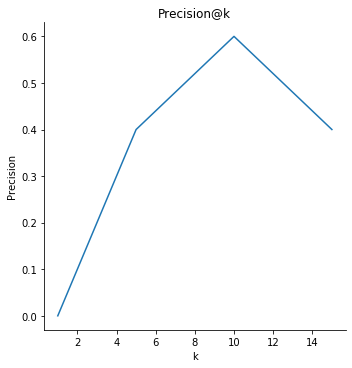

In [26]:
# run Probabilistic Retrieval and evaluate it on different k
res = list()
for k in ks:
    res.append({'Precision': compute_precision_at_k(retrieved_tweets_prob, tweets[['id', 'relevant']], k),
                'k': k})
res_df = pd.DataFrame(res)
sns.relplot(data=res_df, x="k", y="Precision", kind="line").set(title='Precision@k')

**➡️ PLEASE WRITE YOUR ANSWER HERE**

|

|
The more documents we retrieve, the more unrelated/irrelevant ones we will get too, and therefore the precision@k will be decreased at some point.

_Extra note: When it comes to the recall@k case which takes into account all the relevant docs, the more documents we retrieve the more relevant to the query documents we will have._

|


> #### 5.3 Discuss the following plot regarding the impact of the $\lambda$ (lambda) in the query-document likelihood probability $P(q|Doc)$.

In this example we estimate the likehood for a given query and a given tweet (see below). The $P(t|M_c)$ values are the same as in the rest of the notebook and are calculated based on the whole document collection. 

In [27]:
new_query = ["katie","ledecky","swimmer"]
a_document= tweets['clean_tweet'].tolist()[3]

print('The query: "{}""'.format(' '.join(new_query)))
print('Tweet: "{}"'.format(tweets['tweet'].tolist()[3]))

The query: "katie ledecky swimmer""
Tweet: "Is Katie Ledecky competing in the 2024 Paris Olympics? #allaboutsportsch"


   Likelihood  lambda
0    0.000247    0.00
1    0.001855    0.25
2    0.004954    0.50
3    0.009544    0.75
4    0.015625    1.00


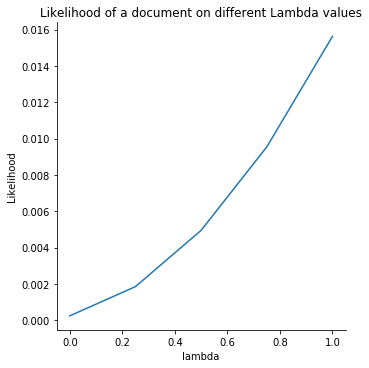

In [28]:
# for each lambda get the query-document likehood estimation.
lambdas = [0, 0.25, 0.5, 0.75, 1]
probabilities = list()
for l in lambdas:
    probabilities.append({'Likelihood': compute_query_likelihood(new_query, a_document,  p_Mc, l),
                         'lambda': l})

res_df = pd.DataFrame(probabilities)
print(res_df)
sns.relplot(data=res_df, x="lambda", y="Likelihood", 
            kind="line").set(title='Likelihood of a document on different Lambda values')

**➡️ PLEASE WRITE YOUR ANSWER HERE**

|

Answer:
By increasing the value of lambda, we more focus on the term frequency of the given document, while by decreasing the value we give more weight on the term distribution in the whole corpus.

|


## 🔚 END OF EXAM
> Don't forget to change the submitted file with your SciperNo as the file name before submitting.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Distributed-Information-Systems" data-toc-modified-id="Distributed-Information-Systems-0"><span class="toc-item-num">1&nbsp;&nbsp;</span>Distributed Information Systems</a></span></li><li><span><a href="#Word-Representation-for-Concept-Identification" data-toc-modified-id="Word-Representation-for-Concept-Identification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word Representation for Concept Identification</a></span><ul class="toc-item"><li><span><a href="#Build-the-vocabulary-by-selecting-top-k-frequent-words" data-toc-modified-id="Build-the-vocabulary-by-selecting-top-k-frequent-words-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Build the vocabulary by selecting top-k frequent words</a></span></li><li><span><a href="#Construct-the-word-cooccurence-matrix" data-toc-modified-id="Construct-the-word-cooccurence-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Construct the word cooccurence matrix</a></span></li><li><span><a href="#Perform-SVD-on-the-matrix-and-select-the-largest-singular-values" data-toc-modified-id="Perform-SVD-on-the-matrix-and-select-the-largest-singular-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Perform SVD on the matrix and select the largest singular values</a></span></li></ul></li><li><span><a href="#Vector-based-retrieval-using-Word-representations" data-toc-modified-id="Vector-based-retrieval-using-Word-representations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vector-based retrieval using Word representations</a></span><ul class="toc-item"><li><span><a href="#Document-and-query-vectors-from-word-representations" data-toc-modified-id="Document-and-query-vectors-from-word-representations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Document and query vectors from word representations</a></span></li><li><span><a href="#Retrieve-top-10-relevant-documents" data-toc-modified-id="Retrieve-top-10-relevant-documents-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Retrieve top-10 relevant documents</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Evaluate-retrieval-result-using-DCG" data-toc-modified-id="Evaluate-retrieval-result-using-DCG-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluate retrieval result using DCG</a></span></li><li><span><a href="#Explain-the-DCG-values-plot" data-toc-modified-id="Explain-the-DCG-values-plot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explain the DCG values plot</a></span></li></ul></li><li><span><a href="#Submit-your-notebook" data-toc-modified-id="Submit-your-notebook-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Submit your notebook</a></span></li></ul></div>

# Distributed Information Systems
***Midterm Exam, Fall-Winter Semester 2021-22***

The following materials are allowed: exercise sheets and solutions, past exams with your own solution, personally written notes and personally collected documentation.

The exam will be held on your computer, but digital communication by any means is strictly prohibited. 
By participating to this exam you agree to these conditions.

These are the instructions for the exam:

1. You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
* We will publish 15 minutes before the end of the exam a password for uploading your solutions on Moodle.
* It is not recommended to leave the exam before the password is published. If you need to leave earlier, contact us.

In [1]:
#Required libraries
import math
import os
import string
from collections import defaultdict
from operator import itemgetter
from pprint import pprint

import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')).union(set(stopwords.words('french')))

[nltk_data] Downloading package punkt to /Users/romanou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romanou/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
def read_corpus():
    '''Reads corpus from files.'''
    
    documents = []
    orig_docs = []
    DIR = './'
    tknzr = TweetTokenizer()
    with open("epfldocs.txt", encoding = "utf-8") as f:
        content = f.readlines()
    for text in content:
        orig_docs.append(text)
        # split into words
        tokens = tknzr.tokenize(text)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # filter out stop words
        words = [w for w in words if not w in stop_words]

        documents.append(' '.join(words))
    return documents, orig_docs

documents, orig_docs = read_corpus()

In [3]:
assert(len(documents) == 1075)

# Word Representation for Concept Identification

We will build word representations in a latent concept space using SVD. Differently to Latent Semantic Indexing (LSI) we will derive the latent concepts space from the **word co-occurrence matrix** (and not from the term-document matrix, as in standard LSI).

An entry (i,j) in the word co-occurrence matrix corresponds to the number of times the word i co-occurs with the word j in the context of word i. The context of the words consist of the words preceding or succeeding the word in the text.  

By deriving an SVD from the word co-occurrence matrix, and selecting the top dimensions of the latent space, we obtain a word representation as vectors over a concept space. Commonly such word representations are also called word embeddings.
 

## Build the vocabulary by selecting top-k frequent words
No code is required for this part.

In [4]:
# vocabulary is the list of all words
# vocabulary_to_index maps words to their index

def create_vocabulary_frequency(corpus, vocab_len):
    '''Select top-k (k = vocab_len) words in term of frequencies as vocabulary'''
    vocabulary_to_index = {}
    count = defaultdict(int)
    for document in corpus:
        for word in document.split():
                count[word] += 1
    
    sorted_count_by_freq = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

    vocabulary = []
    for i, x in enumerate(sorted_count_by_freq[:vocab_len]):
        vocabulary.append(x[0])
        vocabulary_to_index[x[0]] = i
    return vocabulary, vocabulary_to_index

vocab_freq, vocabulary_to_index = create_vocabulary_frequency(documents, 5000)

## Construct the word cooccurence matrix

In this question, you need to construct the word co-occurence matrix, given the vocabulary and the set of documents.

The value of a cell (i,j) is the number of times the word i co-occurs with the word j in the context of word i.

For this question, a word $w_i$ cooccurs with a word $w_j$ in the context of word $w_i$ if $w_j$ preceeds or succeeds $w_i$ with a distance **at most 2**.

Example: For this document "*how to bake bread without bake recip*", the words coocur with the word "*bread*" are "*to, bake, without, bake*".

Make sure that you consider only words that appear in the vocabulary.

In [5]:
def construct_word_cooccurence_matrix(vocabulary_to_index, documents, k=2):
    matrix = np.zeros((len(vocabulary_to_index), len(vocabulary_to_index)))
    for document in documents:
        terms = document.split()
        for ind, term_i in enumerate(terms):
            if term_i in vocabulary_to_index:
                for context_ind in range(max(0, ind-2), min(len(terms), ind+3)):
                    if context_ind != ind and terms[context_ind] in vocabulary_to_index:
                        matrix[vocabulary_to_index[term_i], vocabulary_to_index[terms[context_ind]]] += 1
    return matrix

word_cooccur_matrix = construct_word_cooccurence_matrix(vocabulary_to_index, documents)

You can optionally check whether the matrix you constructed is correct using the following code:

In [6]:
assert_matrix = False
if assert_matrix:
    word_coor_mat = np.load("word_coocur_matrix.npy")
    assert(word_coor_mat == word_cooccur_matrix[:100,:100]).all()

## Perform SVD on the matrix and select the largest singular values 

We perform SVD on the matrix $\mathbf{M} = \mathbf{K}\mathbf{S}\mathbf{D}^T$ and select the first 128 largest singular values.

Then, we can use the submatrix $\mathbf{K_s}$, corresponding to the largest singular values, as the word representation matrix. 

Hint 1 : Are the words represented in $\mathbf{K_s}$ as rows or columns?

Hint 2: np.linalg.svd(M, full_matrices=False) performs SVD on the matrix $\mathbf{M}$ and returns $\mathbf{K}, \mathbf{S}, \mathbf{D}^T$

 -  $\mathbf{K}, \mathbf{D}^T$ are matrices with orthonormal columns
 -  $\mathbf{S}$ is a **vector** of singular values in a **descending** order
 
Hint 3: np.diag(V) converts a vector to a diagonal matrix

Hint 4: To select:
 - the first k rows of a matrix A, use A[0:k, :]
 - the first k columns of a matrix A, use A[:, 0:k]
 - the submatrix from first k rows and k columns of a matrix A, use A[0:k, 0:k]

In [7]:
# Input: a word coocurrence matrix and the number of singular values that will be selected
# Output: K_s, S_s, Dt_s are similar to the defintion in the lecture

def truncated_svd(word_cooccur_matrix, num_val):
    # The following may take 1-2 minutes since we are decomposing a matrix of size 5000x1075
    K, S, Dt = np.linalg.svd(word_cooccur_matrix, full_matrices=False) 
    
    K_sel = K[:, :num_val]
    S_sel = np.diag(S)[:num_val, :num_val]
    Dt_sel = Dt[:num_val, :]
    return K_sel, S_sel, Dt_sel

K_s, S_s, Dt_s = truncated_svd(word_cooccur_matrix,128)

# Vector-based retrieval using Word representations



## Document and query vectors from word representations

For each document and query, we construct the corresponding vector by **averaging** its word representations.

Hint: not all words are in the vocabulary!

In [9]:
def get_doc_vecs(documents, word_embedding_matrix, vocabulary_to_index):
    doc_vecs = np.zeros((len(documents), word_embedding_matrix.shape[1]))

    w_emb = lambda w: word_embedding_matrix[vocabulary_to_index[w]] if w in vocabulary_to_index else np.zeros((word_embedding_matrix.shape[1]))
    d_emb = lambda d: np.average(list(map(w_emb, d.split()+[''])), axis=0)

    doc_vecs = np.stack(list(map(d_emb, documents)), axis=0)
    
    return doc_vecs

doc_vecs = get_doc_vecs(documents, K_s, vocabulary_to_index)

## Retrieve top-10 relevant documents

Retrieve top-10 relevant documents for the query "*computer science*"

Hint: you may use the function get_doc_vecs

In [10]:
query = "computer science"

query_vec = get_doc_vecs([query], K_s, vocabulary_to_index)[0]

In [11]:
def cosine_similarity(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy*1.0/math.sqrt(sumxx*sumyy)

def retrieve_documents(doc_vecs, query_vec, top_k):
    scores = [[cosine_similarity(query_vec, doc_vecs[d,:]), d] for d in range(len(documents))]
    scores.sort(key=lambda x: -x[0])
    doc_ids = []
    retrieved = []
    for i in range(top_k):
        doc_ids.append(scores[i][1])
        retrieved.append(orig_docs[scores[i][1]])
    return doc_ids, retrieved

retrieved_ids, retrieved_docs = retrieve_documents(doc_vecs, query_vec, top_k=10)

/Users/smeros/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


# Evaluation
We consider the scikit reference code as an “oracle” that supposedly gives the correct result. 

In [12]:
# Retrieval oracle 
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), vocabulary=vocab_freq, min_df = 1, stop_words = 'english')
features = tf.fit_transform(documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, features, threshold=0.1):
    new_features = tf.transform([query])
    cosine_similarities = linear_kernel(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold:
            break
        doc_ids.append(related_docs_indices[i])
    return doc_ids

# gt_ids are the document ids retrieved by the oracle
gt_ids = search_vec_sklearn(query, features)

We also assume that there is a user that has done the grading of all the documents according to their relevance. 
The top-10 results using scikit-learn have grade 3, the next 10 results have grade 2, 
the rest in the list has grade 1 while non-relevant results have grade 0.

In [13]:
grade = []
for i in range(len(documents)):
    if i in gt_ids[:10]:
        grade.append(3)
    elif i in gt_ids[10:20]:
        grade.append(2)
    elif i in gt_ids[20:]:
        grade.append(1)
    else:
        grade.append(0)

## Evaluate retrieval result using DCG 

Discounted Cumulative Gain (DCG) is a retrieval metric that also takes into account the ordering of the result. 

The DCG accumulated at a rank $k$ is defined as:

$DCG_k = \sum_{i=1}^k \frac{grade[i]}{log_2(i+1)}$

where $grade[i]$ is the relevance score given by the user for the result at position $i$.

Hint: the logarithm is computed using the function np.log2

In [14]:
def dcg(k, retrieved_ids, grade):
    dcg_val = 0
    for i in range(1, k):
        dcg_val += grade[i] / math.log2(i+1)
    return dcg_val

We compute the DCG for the top-1 to the top-10 retrieval results and we plot the values.

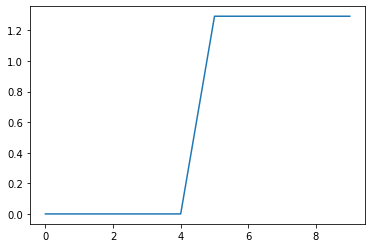

In [15]:
vals = []
for i in range(10):
    val = dcg(i, retrieved_ids, grade)
    vals.append(val)
    
plt.plot(vals)

## Explain the DCG values plot

# Submit your notebook

Go to [Moodle](https://moodle.epfl.ch/course/view.php?id=4051) > Exams > Midterm and follow the instructions.
